# Online Customer Churn Prediction

This notebook is to predict the customer churn using ML techniques. 
**Customer churn** is when customer is about to stop using the services provided.
churn prediction is the key for a businesses as businesses can take steps to retain the customer by discounts and offering

Here in this Notebook all the data exploration, data preprocessing, feature engineering, model training, and evaluation steps are taken care.


Process:

1. Starting the project by Collecting, exploring and comparing the datasets.

2. Finalising the datset that is relevent for the churn prediction.

3. Understanding the datasets on shape, info (checking the datatypes), describe(outliers), Missing values and then imputing missing value treatement

4. Feature Engineering ( getting dummies for categoraical variables)

5. Checking for Class imbalance 

6. Checking the model metrics before and after class imbalance Treatment

7. Performing Train test Split

8. Building Model starting with **Logistic regression** classifiers

9. It is always recommended to start simple as per Occams Razor definition. 

10. We start with simple yet effective model for churn prediction.

11. In Churn prediction **FN** are more important as any customer is actually in churn , 
the model should not predict it as not churn. FN are serous issue . So, recall, F1score , ROC are the metrics for evaluation.

12. After the Logistic regression, Trained the dataset on Advanced classification models like 
   - Decision Tree 
   - Random forest
   - Gradient Boost

13. After comparing the Metrics(Recall,F1-score,ROC,Accurracy) of all the models the best model is taken into account.

14. Evidently AI is used to monitoring model performance and This was choosen as it is easily scalable for our users.



Questions that araises:

What are the feature that impact more churn?<br>
What are different plots needed for getting insights about data?<br>
If outliers how to Identify and Treat them?<br>
Missing Values Handling? Which method to use and why?<br>
Is there any Class imbalance in the dataset?<br>
Which model to choose for the dataset?<br>
How will the metrics for this model determined <br>
How well the Model predict the unseen data?<br>

Work flow of the project:
1. Exploring different Datasets and finalizing a dataset
2. Loading the Finalized dataset
3. Data Cleaning
4. Data Preprocessing
5. EDA
6. Model Building
7. Model Prediction
8. Model Evaluation
9. Monitoring

## Exploring the datasets for churn analysis 


Datasets for  Online retail churn

1. UCI Online Retail Dataset (https://archive.ics.uci.edu/dataset/352/online+retail) <br>
Shape (541910,8) 5 lakhs rows and 8 columns. 
Features are only 8 and  not more relavent to do the analysis 
and the dataset is Old dataset( 2010-11 )
Features
InvoiceNo,
stockCode,
Description,
Quantity,
InvoiceDate,
UnitPrice,
CustomerID,
Country <br>
Among the features only quantity and UnitPrice are valid. No missing values. 
<br>

2. Kaggle dataset(https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset)<br>
Shape (1000,15).Data set contains very less rows. There are high chances of Overfitting
<br>
3. Kaggle dataset(https://www.kaggle.com/datasets/utkalk/large-retail-data-set-for-eda)<br>
Shape (10000000,70) - Huge size of dataset of 10L records.<br>
Dataset contains both Instore (store distance, store place, store stock) and online shopping details.<br>
Since the problem statement is online churn retail prediction,the instore details are not required and can be removed which makes the shape of dataset (990003,68)
Dataset contains the aggreation columns such as  Average_orderCount,Total_sales, minimum_Shopping amount and these are calcualted based on both online aswell as instore purchases.As we have to remove store level information these will be invalid.So, Dropping all these aggregated columns.<br>
The dataset is very Equally distributed for all the classes of every feature
This gives a intution that the dataset might be the synthetic and will not give aby actual churn related information
esults in not able to get any insight on the classes. No missing values. 
<br>
4. Kaggle(https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data)<br>
Shape (5630, 20)
columns are relevent for problem statement.
Dataset size is good and missing values are less.
<br>

**Finalization:**
considering all the factors I have decided to go ahead with the 4th dataset.
Finalizing the 4th dataset 



### Data set <br>
https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [1]:
# Importing Librabries
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:

# Reading the dataset from local
df = pd.read_excel("C:/Users/keerthi/Downloads/archive (5)/E Commerce Dataset.xlsx", sheet_name=1)

## 2. Data Checking and cleaning

In [3]:

# Checking the dataset size
df.shape

(5630, 20)

In [4]:

# Viewing the sample data points for all the columns
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Dataset:<br> 
The dataset consists of transactional and behavioral data collected from the e-commerce platform. <br>
It contains customer interactions, purchase history, and engagement metrics.

Features:<br> 
Demographic Information: Age, gender, MaritalStatus, CityTier, WarehouseToHome, NumberOfAddress<br>
Behavioral Data: PreferredLoginDevice, PreferedOrderCat, session duration, HourSpendOnApp, 
    NumberOfDeviceRegistered,PreferredPaymentMode<br>
Purchase History: OrderAmountHikeFromlastYear, OrderCount, CouponUsed, DaySinceLastOrder,Tenure<br>
Customer Support Interactions: Complain, SatisfactionScore<br>
Target Variable: Churn (Binary: 1 = Churned, 0 = Active).


In [5]:

# Info will show the datatypes and number of non null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:

# Checking the percentage missing values 
round(df.isnull().sum()/df.shape[0] * 100, 2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [7]:

# Checking the number of unique values of each feature
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [8]:

# Describe is used for checking any outlier for all the numerical variables
# if any jump from 75% to max is noticed, it could be said as the outlier
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Describing the data set features for better understanding

### categorical
PreferredLoginDevice(Mobile Phone,Computer)<br>
PreferredPaymentMode(Debit Card,Credit Card,E wallet,UPI,Cash on Delivery)<br>
Gender(Male,Female)<br>
PreferedOrderCat(Laptop & Accessory,Fashion,Mobile,Grocery,Others)<br>
MaritalStatus(Married,Single,Divorced)<br>
### Discreate numerical
Churn(0/1)<br>
CityTier(1,2,3)<br>
WarehouseToHome(5-127) 34 uniqueue values<br>
Tenure(0-61)<br>
HourSpendOnApp(0-5)<br>
NumberOfDeviceRegistered(1-6)<br>
SatisfactionScore(0-5)<br>
NumberOfAddress (0-22)<br> 
complain(0/1)<br>
OrderAmountHikeFromlastYear(11-26)<br>
CouponUsed(0-16)<br>
OrderCount(1-16)<br>
DaySinceLastOrder(0-46)<br>
### Numerical
CashbackAmount   
### column of not much use
CustomerID

In [9]:

## Customer id does not provide any information for the analysis in churn. so Dropping the feature
df = df.drop(columns = ["CustomerID"])

## 3. Data preprocessing

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Displays the number and sum of categories of each categorical column
for col in categorical_columns:
    print(f'Value counts for {col}:\n')
    print(df[col].value_counts())
    print('-' * 50 )
    print('\n')

Value counts for PreferredLoginDevice:

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
--------------------------------------------------


Value counts for PreferredPaymentMode:

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
--------------------------------------------------


Value counts for Gender:

Gender
Male      3384
Female    2246
Name: count, dtype: int64
--------------------------------------------------


Value counts for PreferedOrderCat:

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
--------------------------------------------------


Value counts for MaritalStatus:

MaritalStatus

#### The following inconsistencies are noticed
In the PreferredLoginDevice column - Mobile Phone, Phone means same<br>
PreferredPaymentMode - Credit Card and CC means same <br>
PreferredPaymentMode - Cash on Delivary and Cod means same <br>
PreferedOrderCat     - Mobile Phone and Mobile means same <br>
Renaming  the classes as one category

In [11]:

# Replacing similar category values in the categorical columns as observed above
df["PreferredLoginDevice"].replace("Phone", "Mobile Phone", inplace = True)
df["PreferredPaymentMode"].replace(["CC", "COD"], ["Credit Card", "Cash on Delivery"], inplace = True)
df["PreferedOrderCat"].replace("Mobile Phone", "Mobile", inplace = True)

In [12]:

# Post replacing the categories of the feature
for col in ["PreferredLoginDevice", "PreferredPaymentMode", "PreferedOrderCat"]:
    print(f"categories of {col}: {df[col].unique()}\n")

categories of PreferredLoginDevice: ['Mobile Phone' 'Computer']

categories of PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']

categories of PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']



In [13]:
# join the values of the categorical columns by removing &
# This step will be useful when extracting dummies from dataset where these categories will be used as the column names
df['PreferedOrderCat']=df['PreferedOrderCat'].replace('Laptop & Accessory','Laptop_Accessory')

In [14]:
for i in categorical_columns:
    df[i] = df[i].apply(lambda x: x.replace(" ", ""))

In [15]:
for i in categorical_columns:
    print(df[i].value_counts())
    print("-"*25)

PreferredLoginDevice
MobilePhone    3996
Computer       1634
Name: count, dtype: int64
-------------------------
PreferredPaymentMode
DebitCard         2314
CreditCard        1774
Ewallet            614
CashonDelivery     514
UPI                414
Name: count, dtype: int64
-------------------------
Gender
Male      3384
Female    2246
Name: count, dtype: int64
-------------------------
PreferedOrderCat
Mobile              2080
Laptop_Accessory    2050
Fashion              826
Grocery              410
Others               264
Name: count, dtype: int64
-------------------------
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
-------------------------


### Missing Value imputation using Mode and KNN 

- Mode and KNN behaved the same way almost.
- KNN is more suitable for all possible cases. so using it.
- choosing KNN for the model

In [16]:

# below is the Percentage of Missing Values 
        # Tenure                         4.69
        # WarehouseToHome                4.46
        # HourSpendOnApp                 4.53
        # OrderAmountHikeFromlastYear    4.71
        # CouponUsed                     4.55
        # OrderCount                     4.58
        # DaySinceLastOrder              5.45

        
#for col in ["Tenure", "WarehouseToHome", "HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","DaySinceLastOrder","OrderCount"]:
#    df[col].fillna(df[col].mode()[0], inplace=True)


In [17]:
from sklearn.impute import KNNImputer

# Select only the required columns for imputation
columns_to_impute = ["Tenure", "WarehouseToHome", "HourSpendOnApp",
                     "OrderAmountHikeFromlastYear", "CouponUsed",
                     "DaySinceLastOrder", "OrderCount"]

# Initialize KNN Imputer (k=5 is a common choice)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputer on selected columns
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

In [18]:

# dataset after missing value imputation
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,MobilePhone,3,6.0,DebitCard,Female,3.0,3,Laptop_Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,3.0,MobilePhone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,6.8,MobilePhone,1,30.0,DebitCard,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,MobilePhone,3,15.0,DebitCard,Male,2.0,4,Laptop_Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,MobilePhone,1,12.0,CreditCard,Male,2.6,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [19]:

# Rechecking for  Percentage of Missing Values
round(df.isnull().sum()/df.shape[0] * 100, 2)

Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

## 4. EDA

#### Univariate Analysis

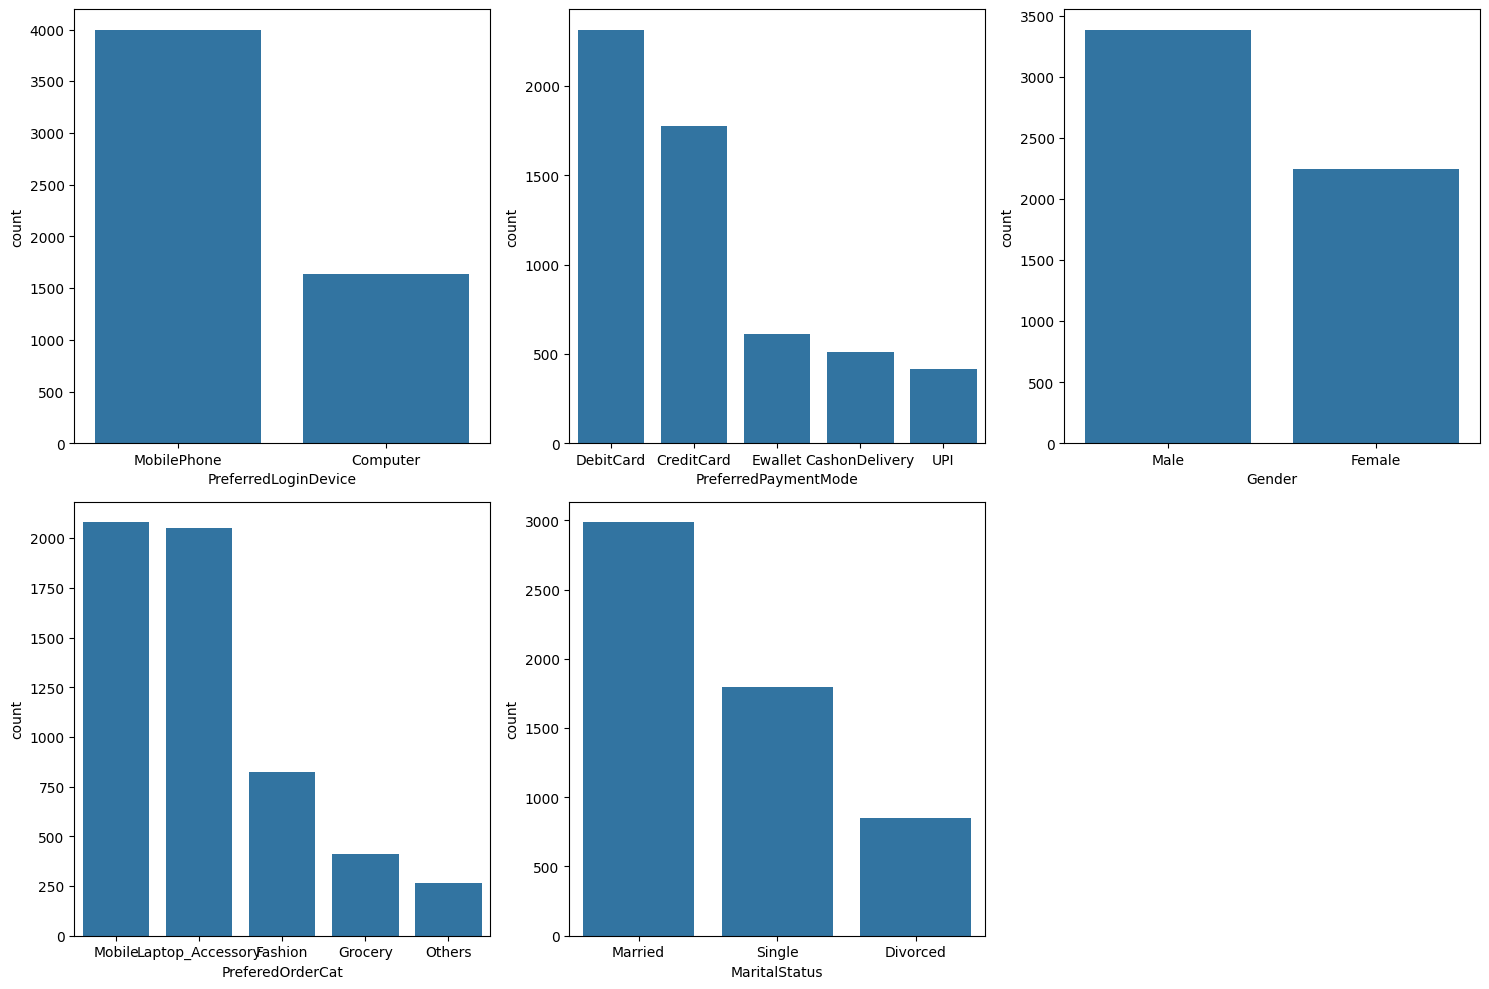

In [20]:
# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Setting up the figure and subplots
n_cols = 3  
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Looping through categorical columns and creating the countplots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    
# Hiding any unused subplots if there are fewer than 3 columns in the last row
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- Mobile Phone is most used<br>
- Married class is more compared to other classes <br>
- Debit cards and Credit cards are frquent mode of paymets<br>
- Mobile, Laptop&Accessories are preferred category<br>

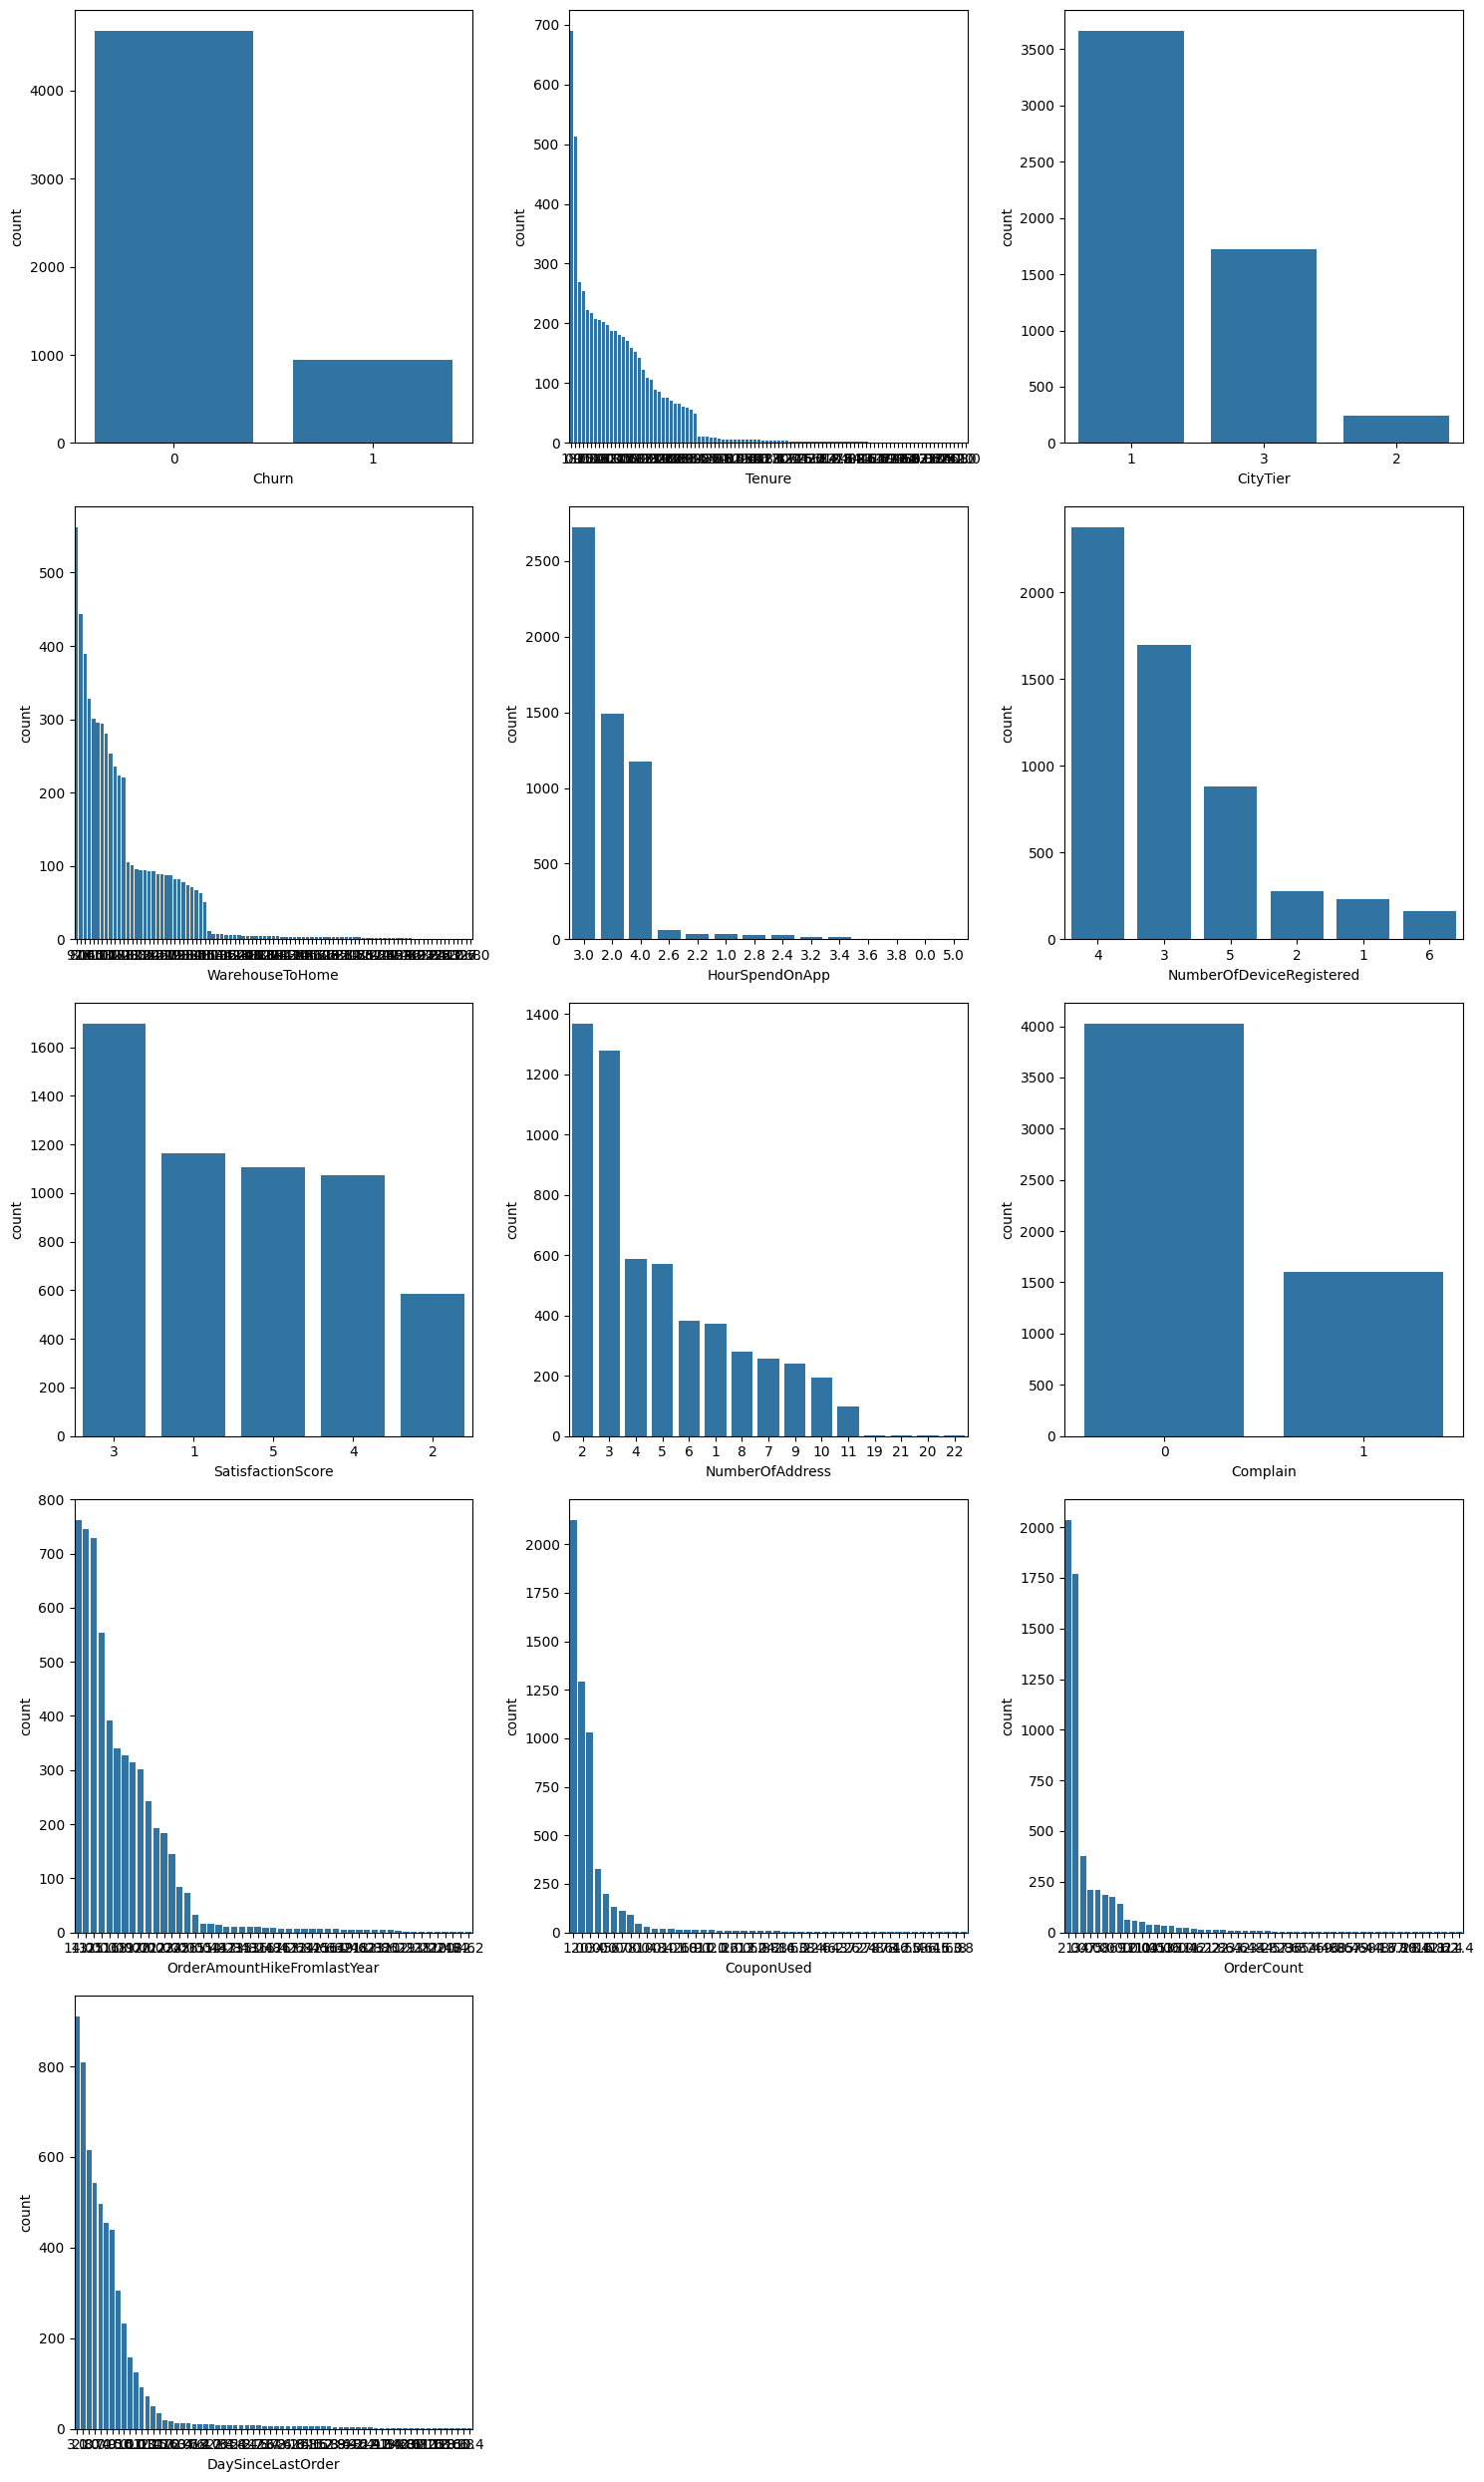

In [21]:
# Selecting Discrete Numerical columns
dis_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('CashbackAmount')


# Setting up the figure and subplots 
n_cols = 3  # Set the number of columns in the row
n_rows = (len(dis_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through
for i, col in enumerate(dis_columns):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    
# Hide any unused subplots if there are fewer than 3 columns in the last row
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- class imbalance between churn =0 and 1 is observed
- Less tier 2 class
- cannot infor much information from warehouesToHome and Tenure, orderamthike, order count, cupon used,Dayssincelastorder

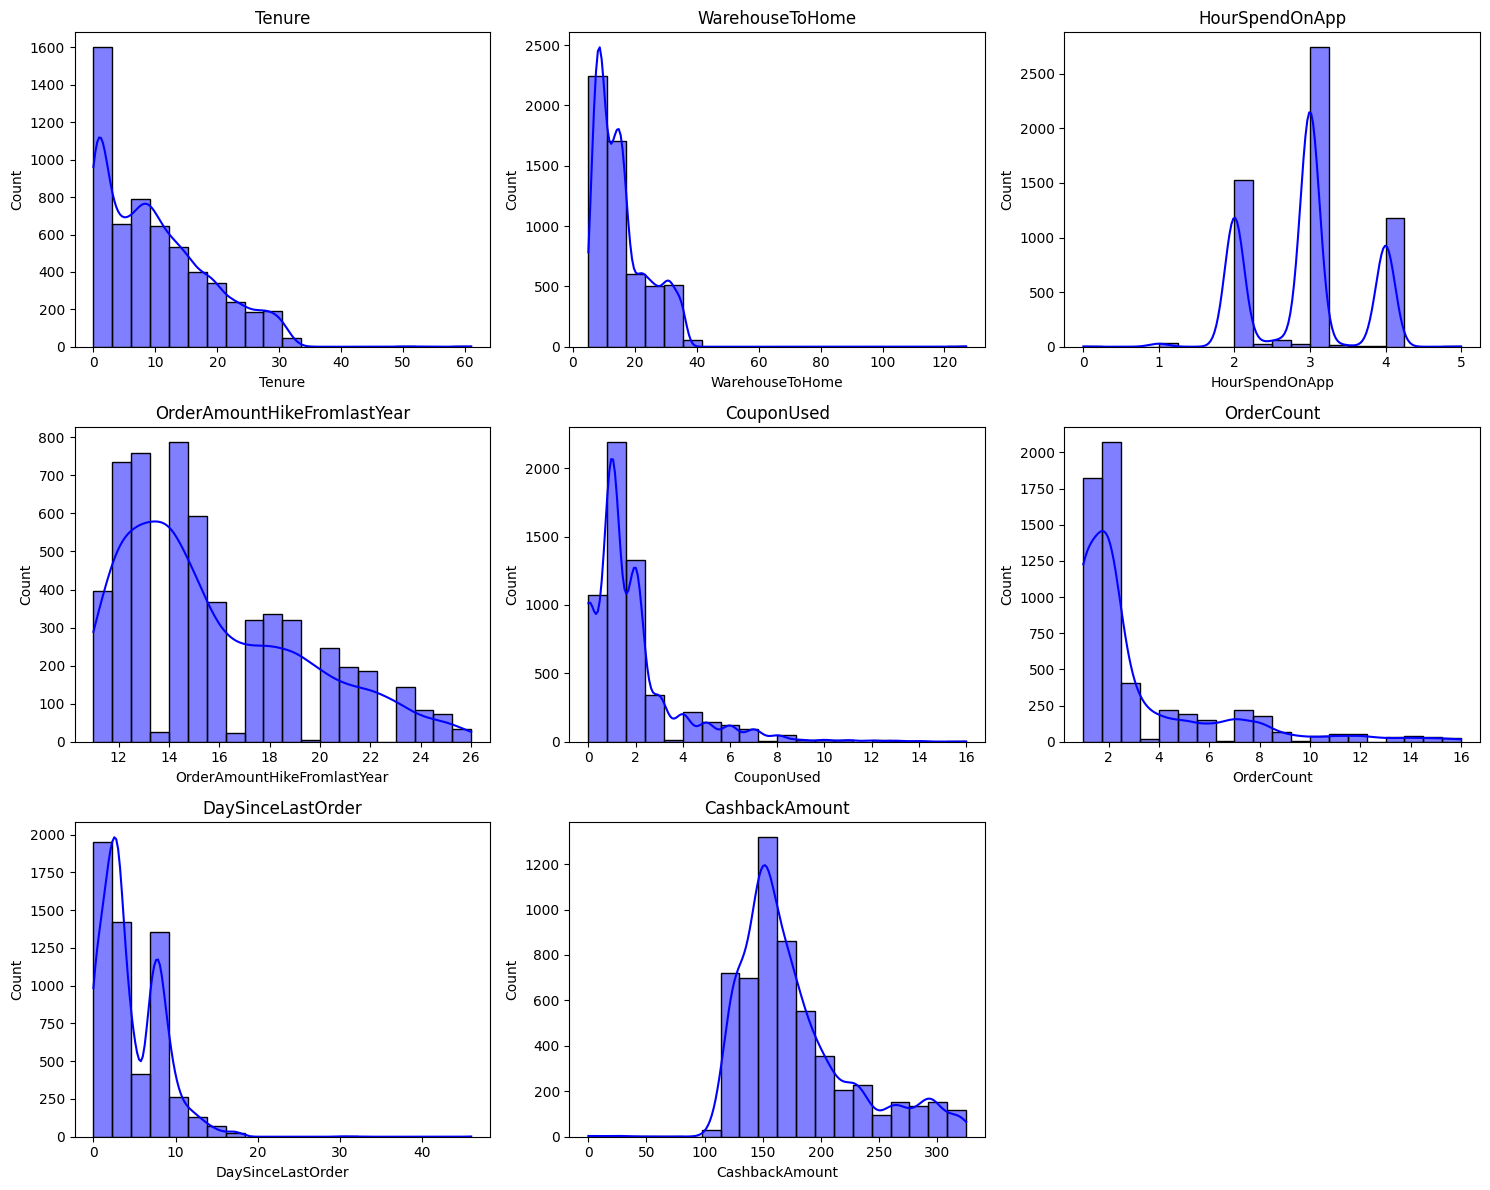

In [22]:
# Selecting numerical columns
num_cols = df.select_dtypes(include=["float64"]).columns 

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  

# Plotting histograms
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(col)

# Hide any unused subplots if there are fewer than 3 columns in the last row
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Outliers in column Tenure:
4 outliers

Outliers in column WarehouseToHome:
3 outliers

Outliers in column HourSpendOnApp:
6 outliers

Outliers in column OrderAmountHikeFromlastYear:
33 outliers

Outliers in column CouponUsed:
697 outliers

Outliers in column OrderCount:
750 outliers

Outliers in column DaySinceLastOrder:
64 outliers

Outliers in column CashbackAmount:
438 outliers

Before log transformation
**************************************************


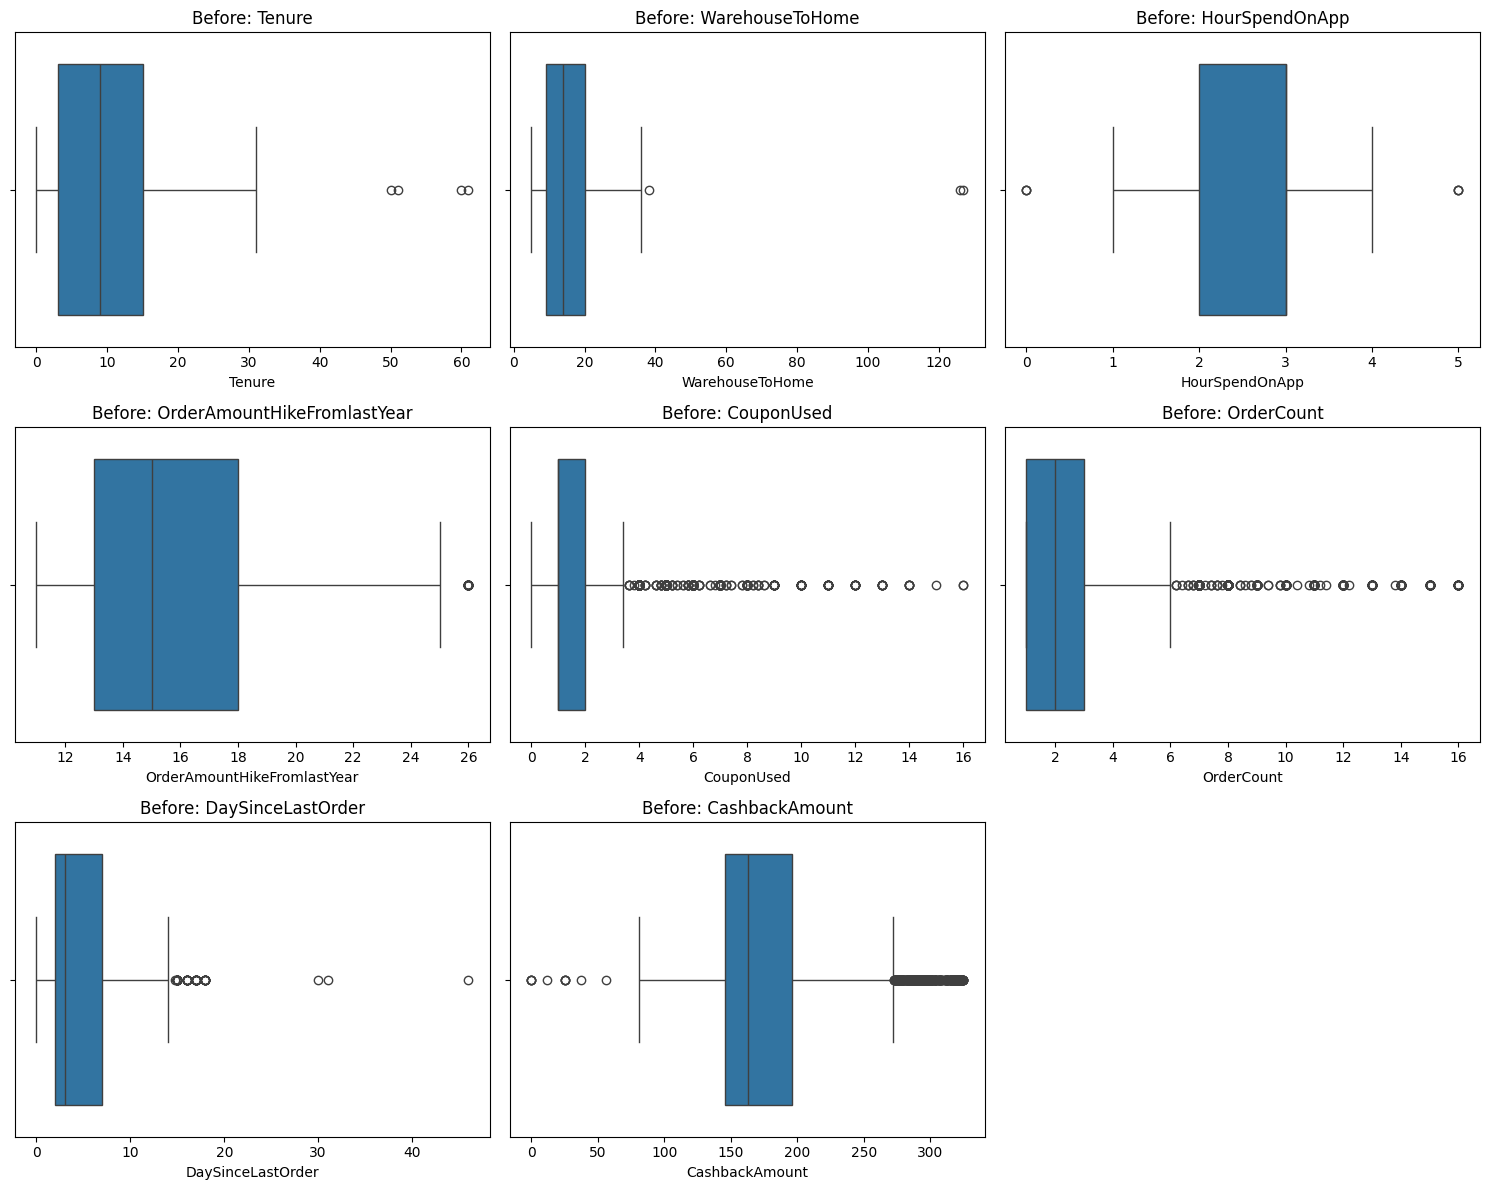

Applying log transformation to column Tenure
Applying log transformation to column WarehouseToHome
Applying log transformation to column HourSpendOnApp
Applying log transformation to column OrderAmountHikeFromlastYear
Applying log transformation to column CouponUsed
Applying log transformation to column OrderCount
Applying log transformation to column DaySinceLastOrder
Applying log transformation to column CashbackAmount
After log transformation
**************************************************


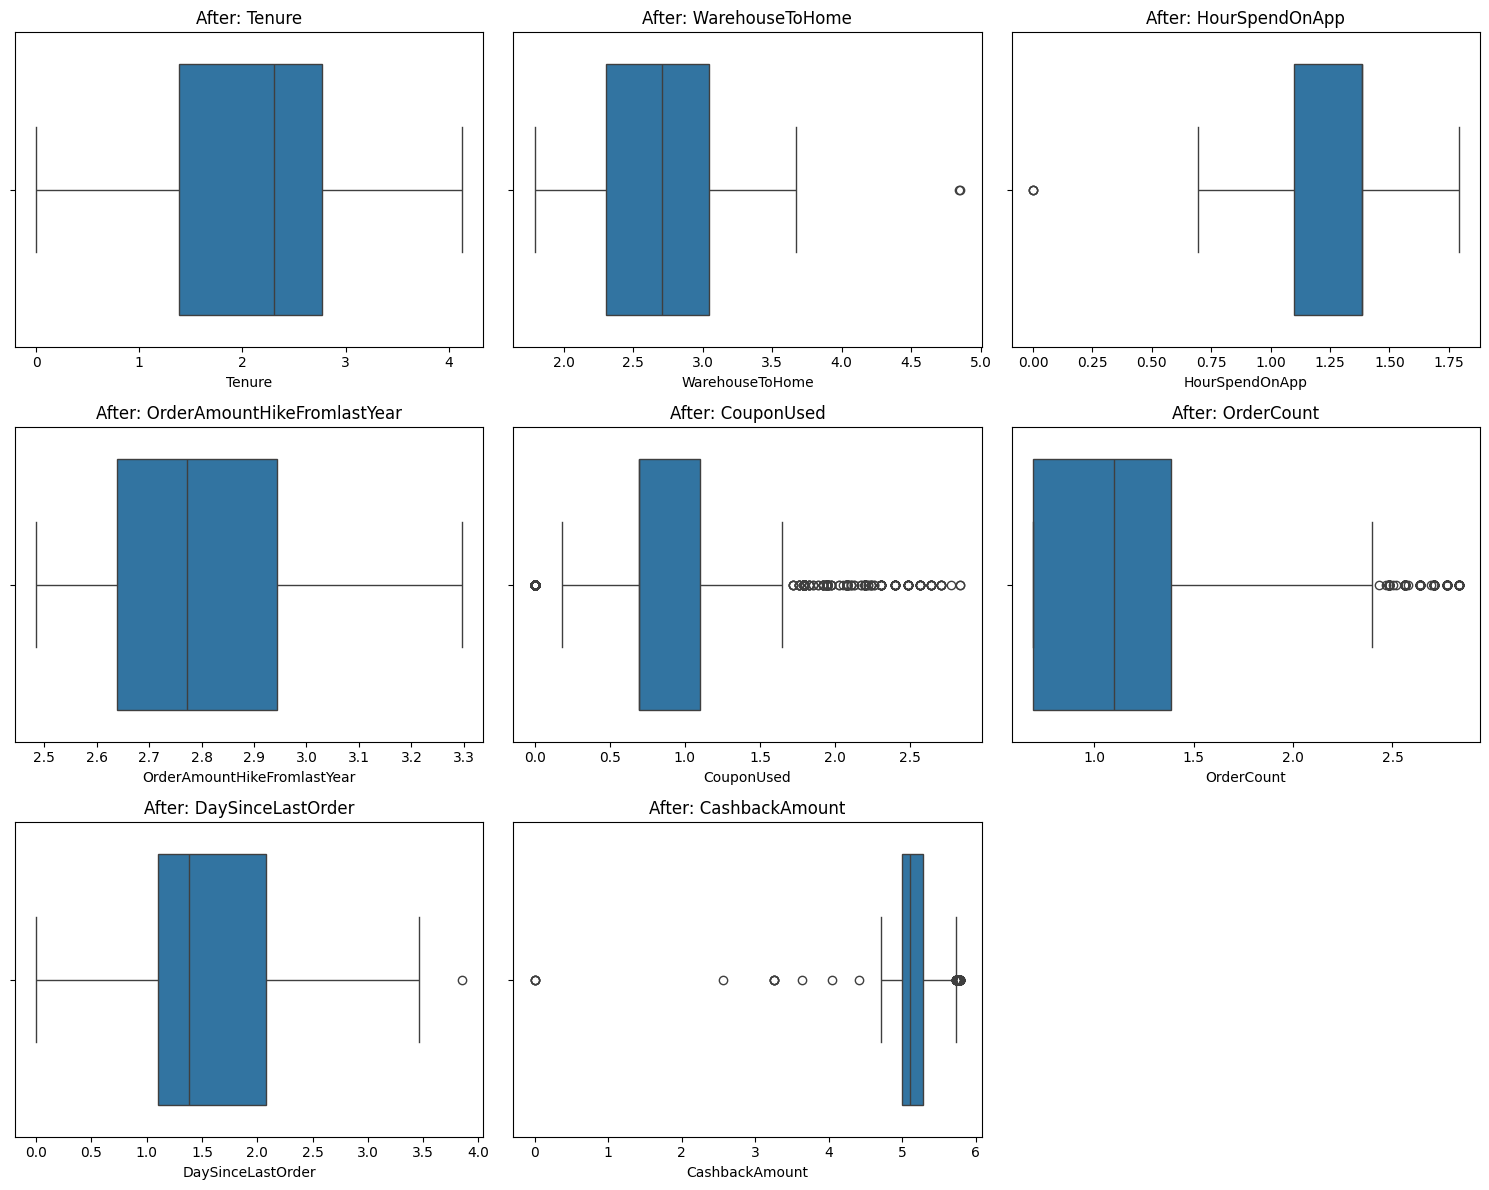

In [23]:
def detect_outliers_iqr(df,num_cols):
    outliers = {}
    
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

outliers = detect_outliers_iqr(df, num_cols)

# Print outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in column {col}:")
    print(outlier_data.shape[0], 'outliers\n')

# Create subplots for the before log transformation for outlier treatment
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
print("Before log transformation")
print("*" * 50)

# Plot box plots before log transformation
for i, col in enumerate(outliers):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Before: {col}')
    
# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Perform log transformation on columns with outliers
df_log_transformed = df.copy()
for col, outlier_data in outliers.items():
    if not outlier_data.empty:  # If there are outliers in the column
        print(f"Applying log transformation to column {col}")
        df_log_transformed[col] = np.log1p(df[col])  # Log transform: log(1 + x)

# Create subplots for the after log transformation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
print("After log transformation")
print("*" * 50)

# Plot box plots after log transformation
for i, col in enumerate(outliers):
    sns.boxplot(x=df_log_transformed[col], ax=axes[i])
    axes[i].set_title(f'After: {col}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Before log transformation


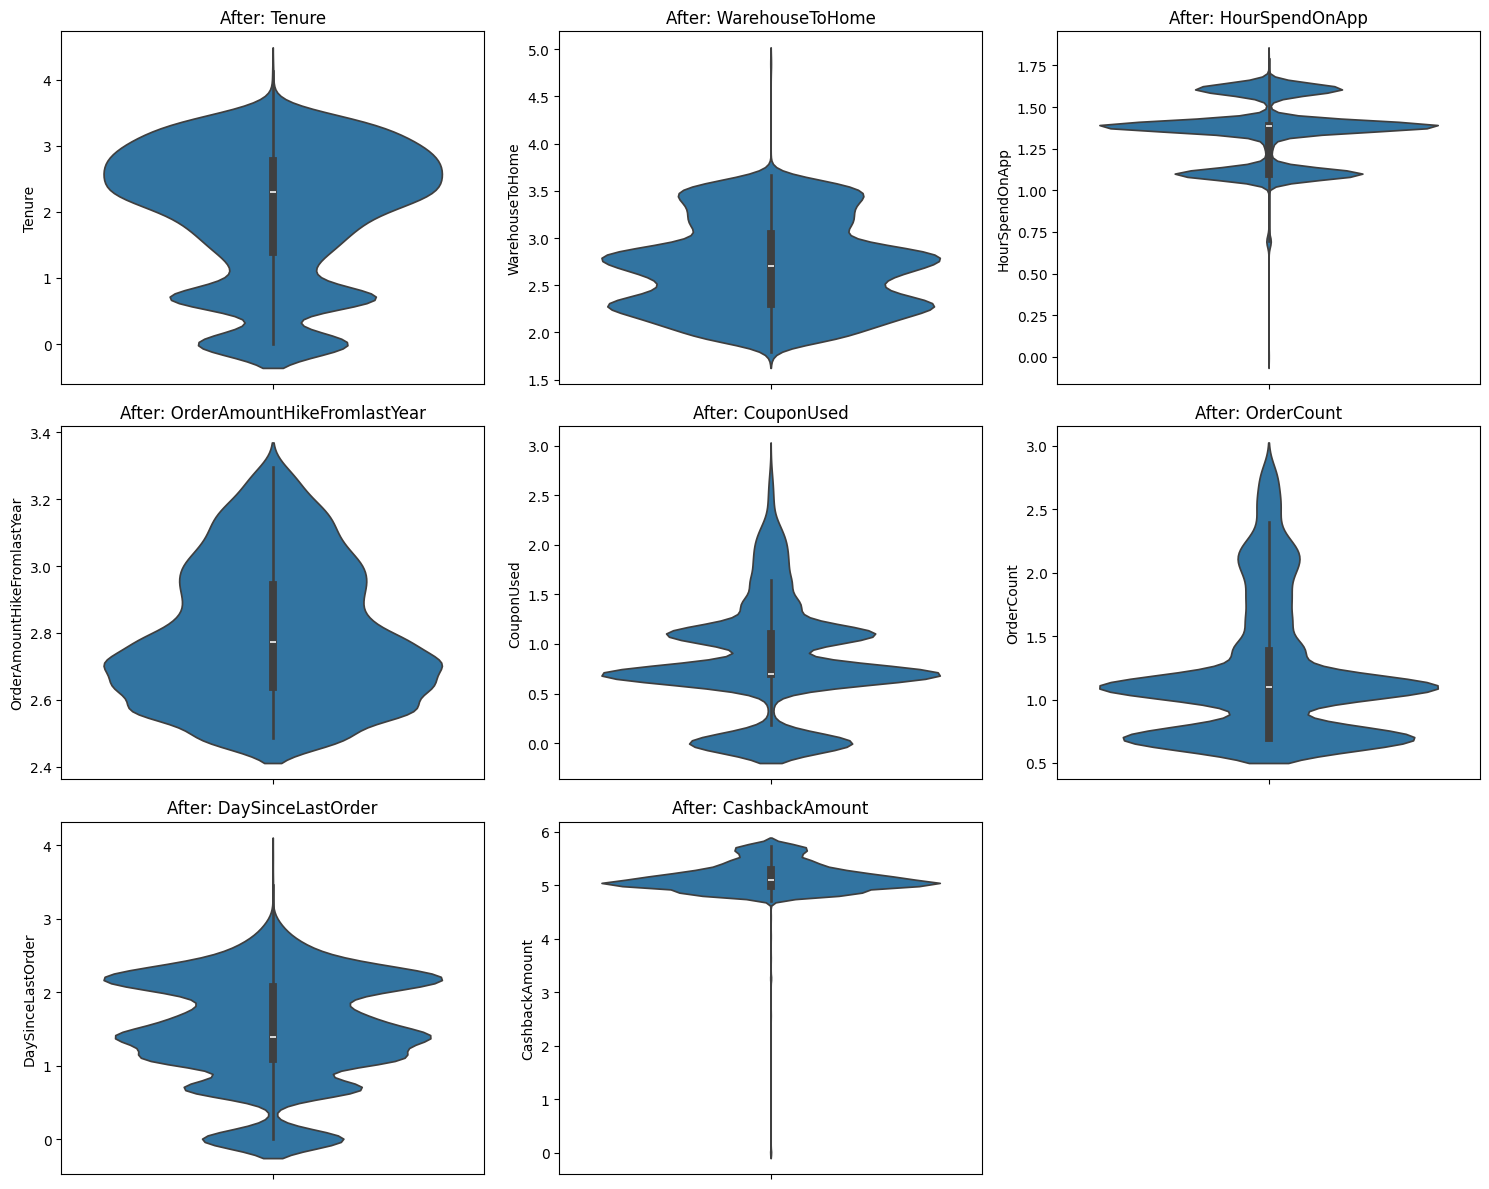

In [24]:
# Create subplots for the after log transformation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
print("Before log transformation")
# Plot box plots after log transformation
for i, col in enumerate(outliers):
    sns.violinplot(y=df_log_transformed[col], ax=axes[i])
    axes[i].set_title(f'After: {col}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Cash back do show some outliers 0 but it means that actaully a user has not recived any cashback<br>so, this cant be considered as outlier

Outliers in column Tenure:
4 outliers

Outliers in column WarehouseToHome:
3 outliers

Outliers in column HourSpendOnApp:
6 outliers

Outliers in column OrderAmountHikeFromlastYear:
33 outliers

Outliers in column CouponUsed:
697 outliers

Outliers in column OrderCount:
750 outliers

Outliers in column DaySinceLastOrder:
64 outliers

Outliers in column CashbackAmount:
438 outliers

Before log transformation
**************************************************


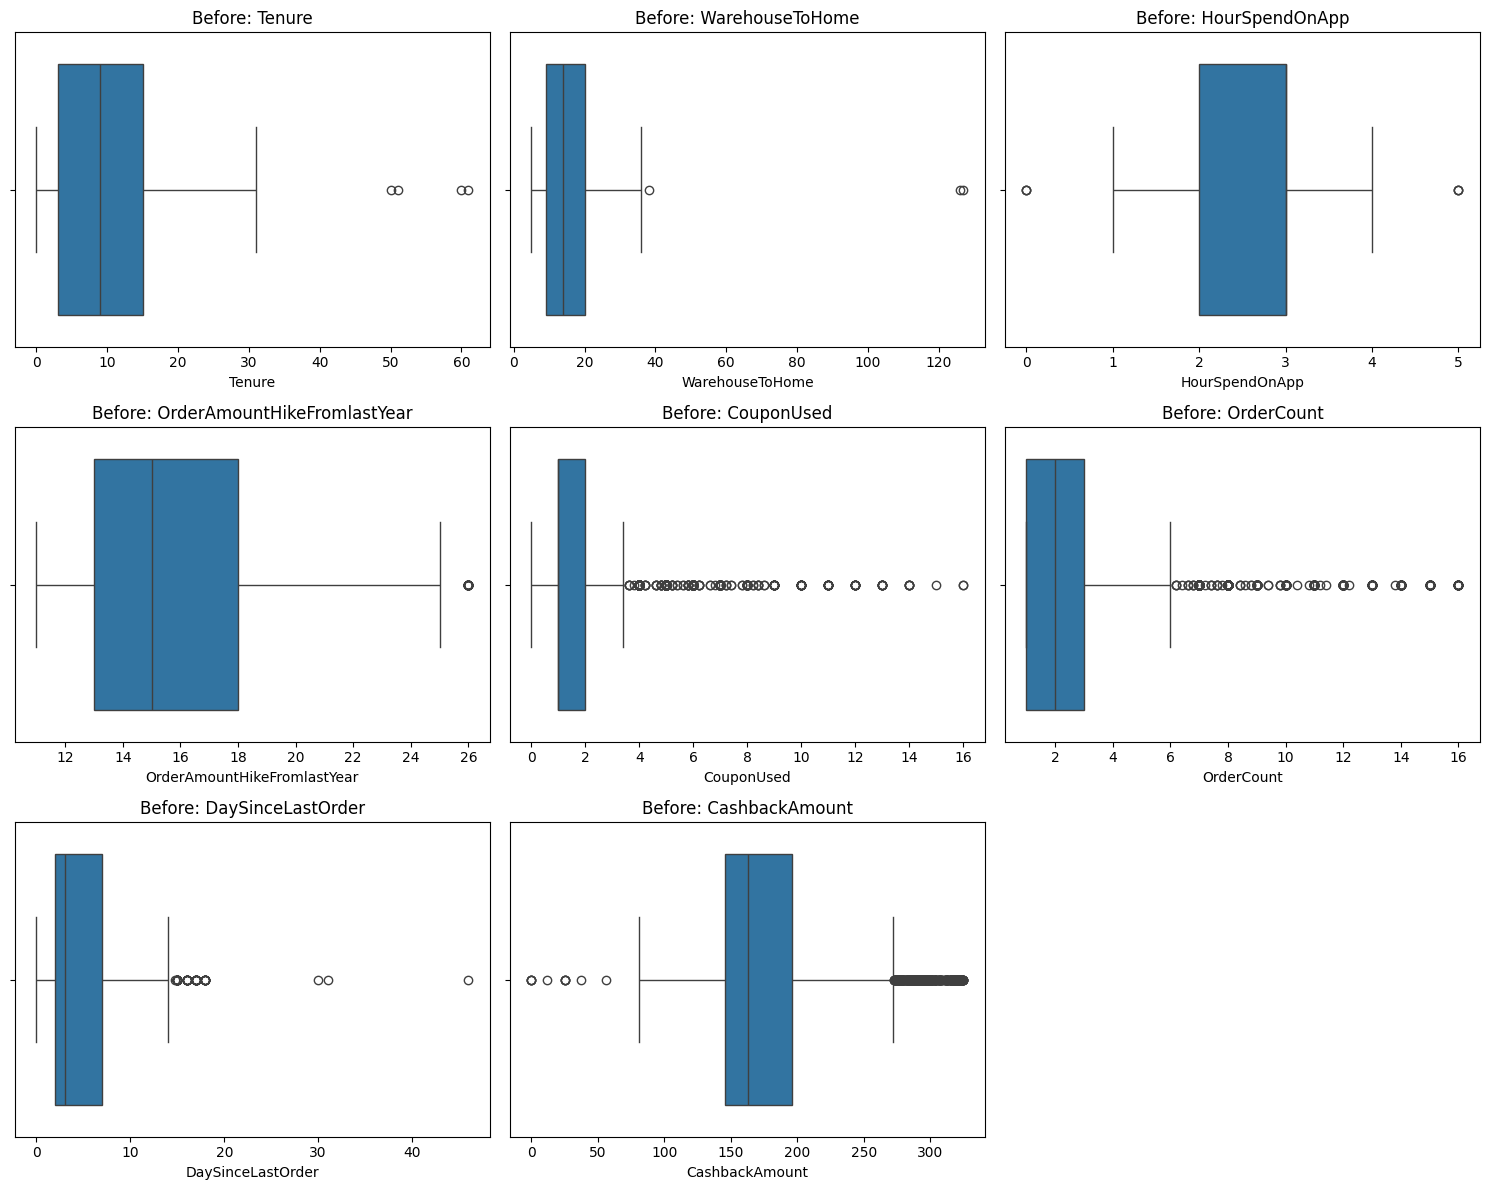

After log transformation
**************************************************


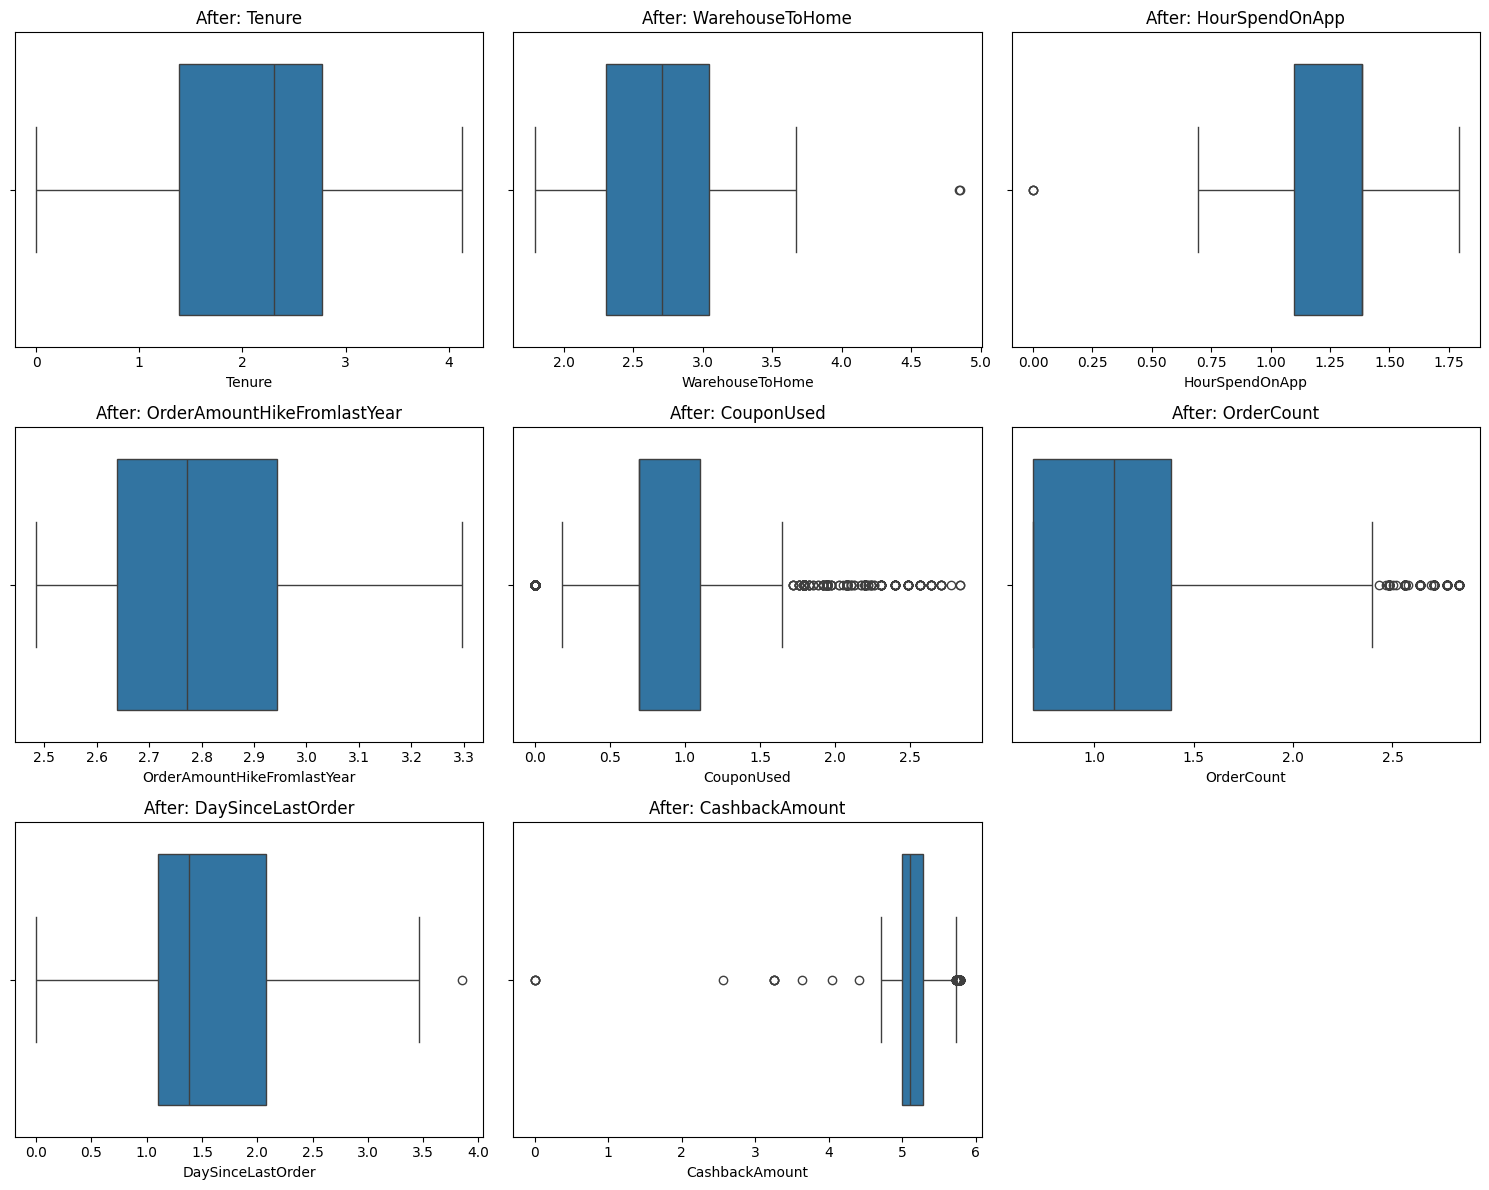

In [25]:
def detect_outliers_iqr(df,num_cols):
    outliers = {}
    
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

outliers = detect_outliers_iqr(df, num_cols)

# Print outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in column {col}:")
    print(outlier_data.shape[0], 'outliers\n')

# Create subplots for the before log transformation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
print("Before log transformation")
print("*" * 50)

# Plot box plots before log transformation
for i, col in enumerate(outliers):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Before: {col}')
    
# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Perform log transformation on columns with outliers
df_log_transformed = df.copy()
for col, outlier_data in outliers.items():
    if not outlier_data.empty:  # If there are outliers in the column
        df_log_transformed[col] = np.log1p(df[col])  # Log transform: log(1 + x)

# Create subplotsc after log transformation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
print("After log transformation")
print("*" * 50)

# Plot box plots after log transformation
for i, col in enumerate(outliers):
    sns.boxplot(x=df_log_transformed[col], ax=axes[i])
    axes[i].set_title(f'After: {col}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [26]:
# log transformed data as it can control outliers
df = df_log_transformed

#### Most of these values are not too high and are actual data. So, keeping them in the dataset

### Bivariate analysis

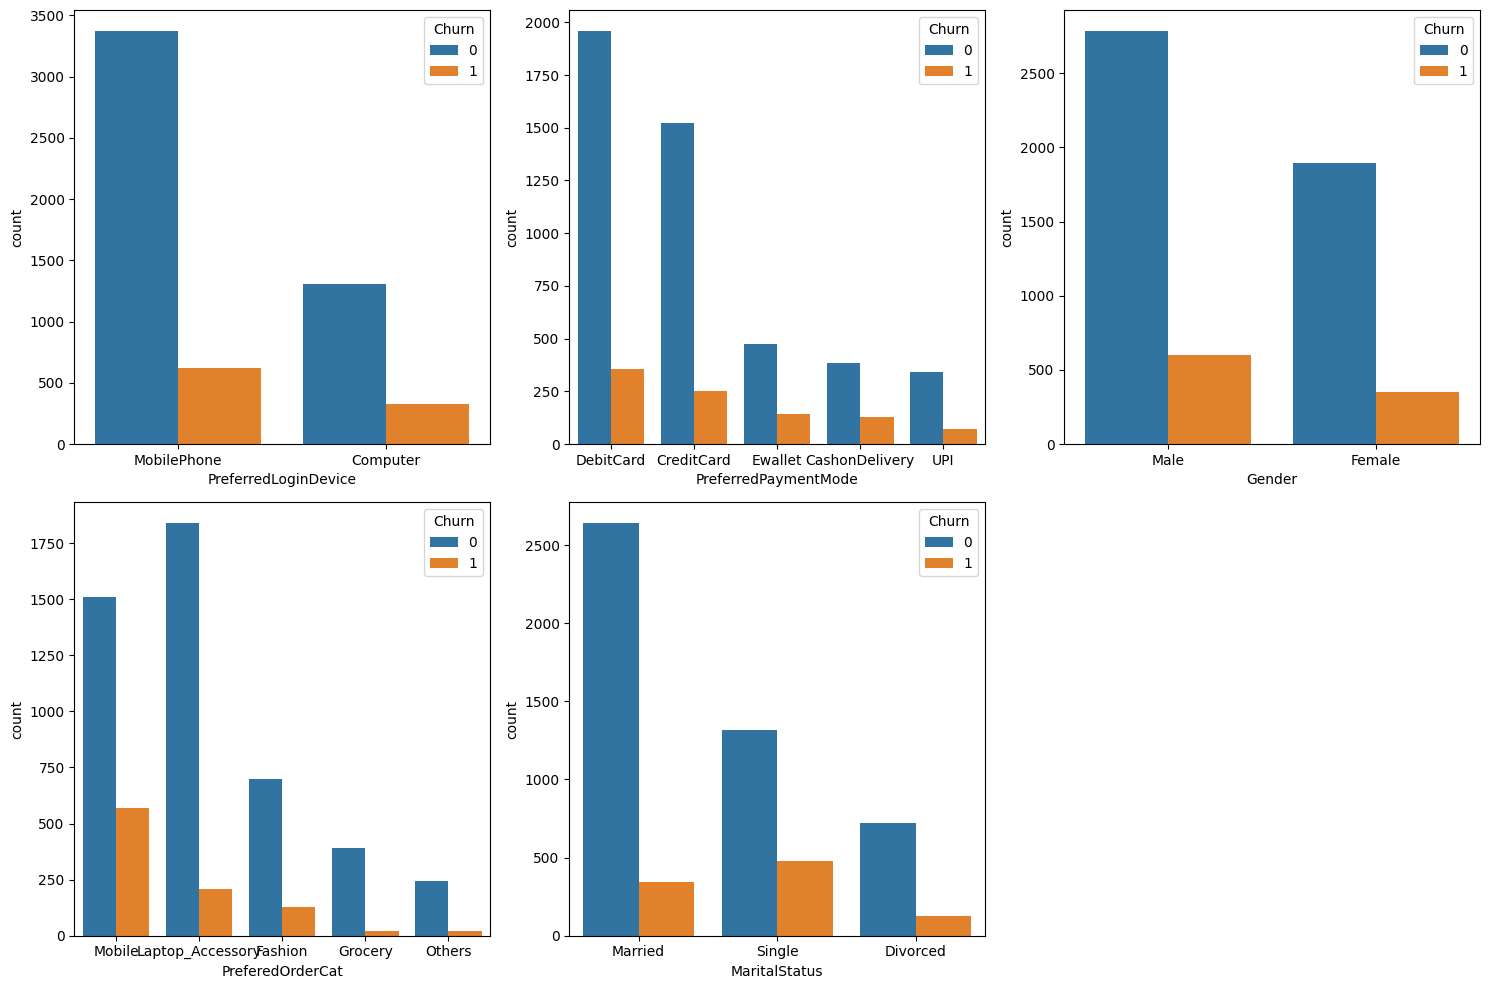

In [27]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
n_cols = 3  
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue="Churn", order=df[col].value_counts().index)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


### analysis
Preferred Login Device :Mobile Phones has less churn overall class <br> 
Marital Status: churn is more positively correlated for Single class<br>
PreferedOrderCat: churn is negligible for Grocery and other<br>
Mobile phone churn is more than all other classes<br>

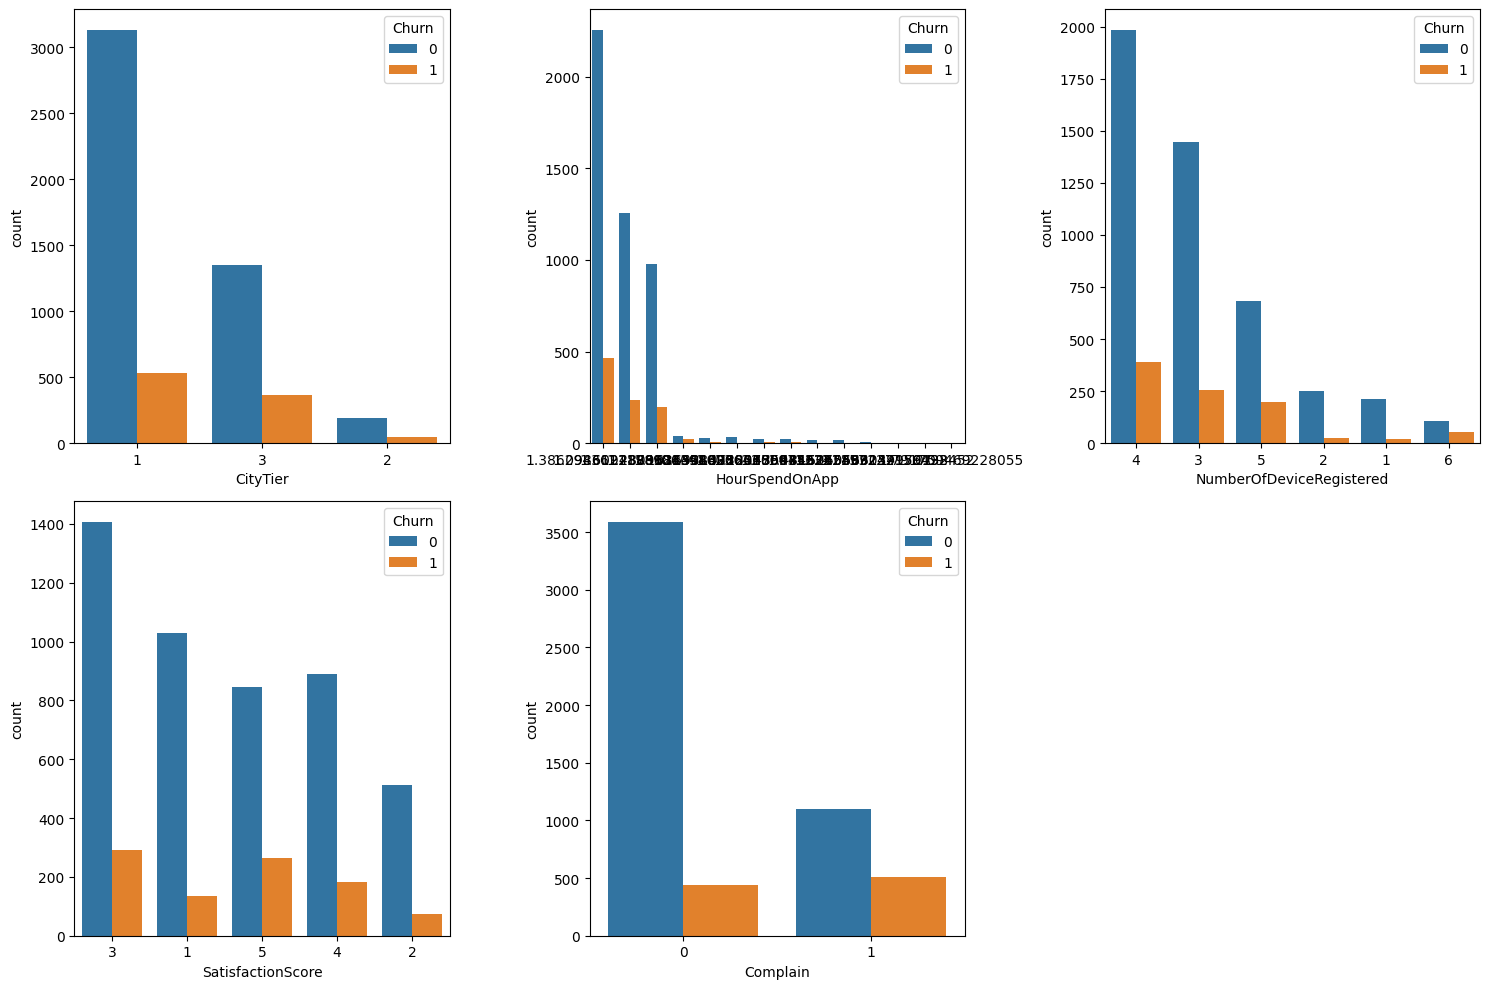

In [28]:
# Selecting Discrete Numerical columns
dis_cols = ['CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','Complain']

# Setting up the figure and subplots
n_cols = 3
n_rows = (len(dis_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(dis_cols):
    sns.countplot(data=df, x=col, ax=axes[i],hue="Churn", order=df[col].value_counts().index)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()

### analysis
Complain =1 has more correlation to churn. 1/3rd values of complain=1 class has churn=1 <br>
NoOfDevices registered =6 has less class as overall but has more churn.<br>
statisfactionscore =1 has less churn and 5 has more churn



### Multivariate Analysis

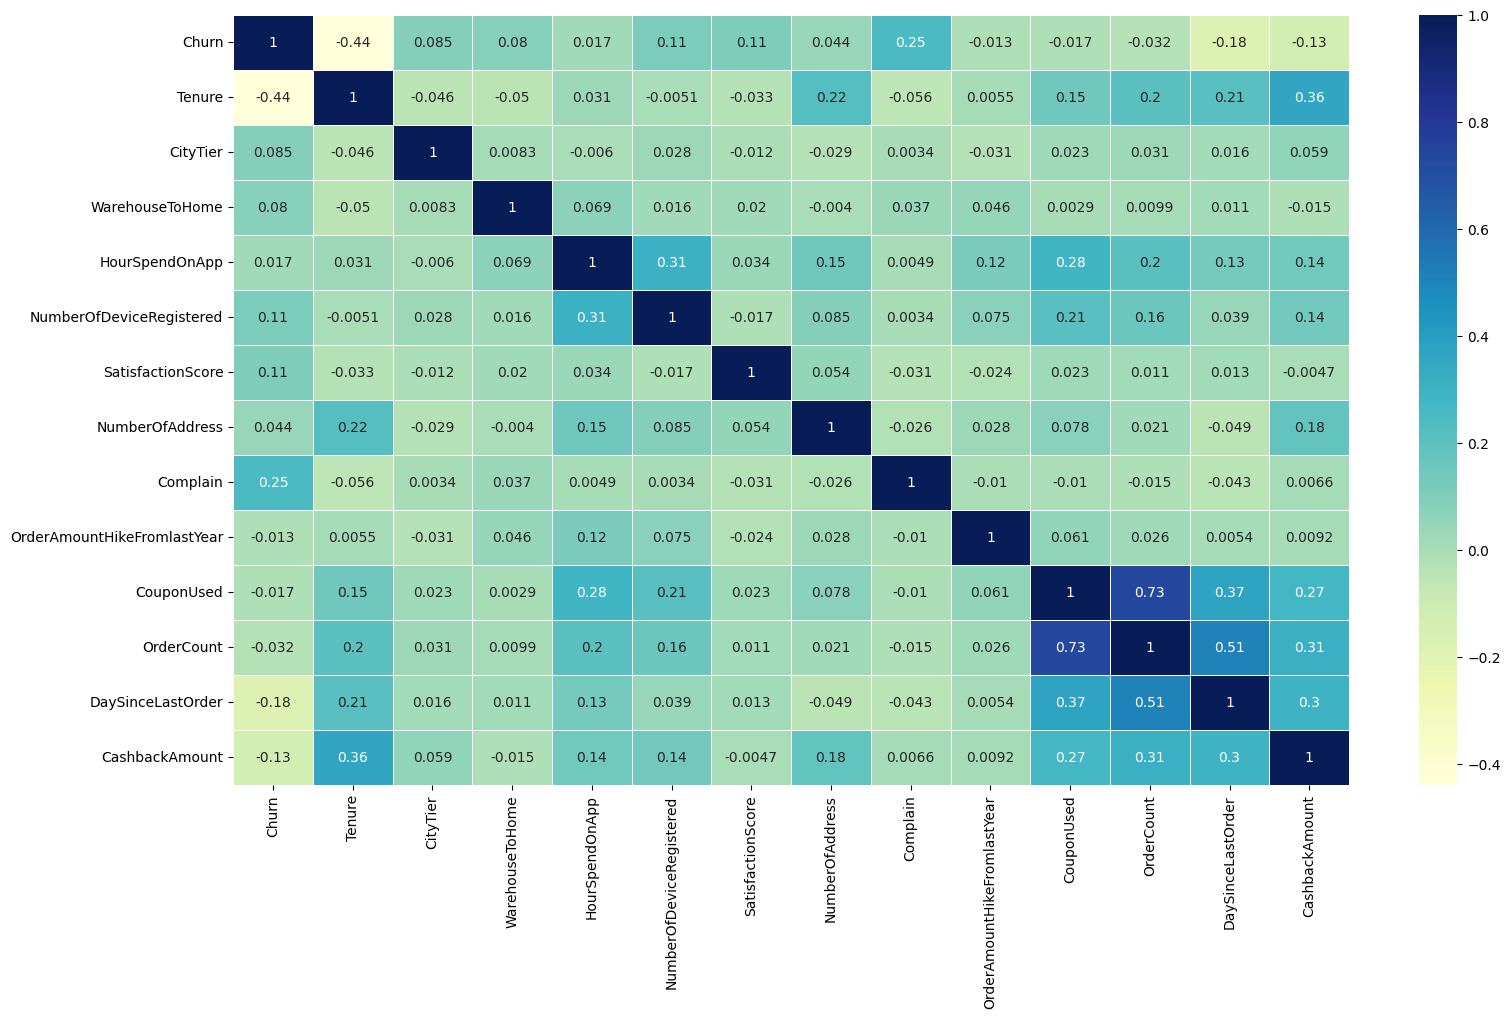

In [29]:

# heat Map for Correlation checking
plt.subplots(figsize=(18,10))
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(),cmap='YlGnBu',annot=True, linewidth=.5)

# plotting
plt.show()

#### using On hot encode to cat values to encode

In [30]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

# encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated for new sklearn versions
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols)).astype(int)
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)


print("\nOne-Hot Encoded DataFrame:")
print(df.info())



One-Hot Encoded DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Churn                              5630 non-null   int64  
 1   Tenure                             5630 non-null   float64
 2   CityTier                           5630 non-null   int64  
 3   WarehouseToHome                    5630 non-null   float64
 4   HourSpendOnApp                     5630 non-null   float64
 5   NumberOfDeviceRegistered           5630 non-null   int64  
 6   SatisfactionScore                  5630 non-null   int64  
 7   NumberOfAddress                    5630 non-null   int64  
 8   Complain                           5630 non-null   int64  
 9   OrderAmountHikeFromlastYear        5630 non-null   float64
 10  CouponUsed                         5630 non-null   float64
 11  OrderCount                  

- Churn is more correlated to complain, Tenure, NoOfdeviceRegistered, SatisfactionScore

## 5. Get dummies for Categorical columns
<br> PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus

In [31]:
# dividing Target and independent variables

X = df.drop('Churn', axis = 1)
y = df["Churn"]


## 6. Class imbalance 

In [32]:
from collections import Counter
#check the imbalance ratio of the  churn data
def resample(y):
    counter = Counter(y)
    majority_class = max(counter.values())
    minority_class = min(counter.values())
    imbalance_ratio = majority_class / minority_class
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

In [33]:
resample(y)

Imbalance Ratio: 4.94


## 7. Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
# Train Test  for both pre and post oversampling data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


### SMOTE to oversample the y =1 for train data - Class imbalance

In [35]:
## Using Synthetic Over sampling of the minority class using SMOTE 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=4)  
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", np.bincount(y_train))
print("Class distribution after SMOTE:", np.bincount(y_resampled))

Class distribution before SMOTE: [3746  758]
Class distribution after SMOTE: [3746 3746]


In [36]:

# checking for class imbalance post train test split
print("\n**Train data**")
print(X_train.shape)
print(y_train.shape)

print("\n**Test data**")
print(X_test.shape)
print(y_test.shape)

print("\n**Train after resampling**")
print(X_resampled.shape)
print(y_resampled.shape)




**Train data**
(4504, 25)
(4504,)

**Test data**
(1126, 25)
(1126,)

**Train after resampling**
(7492, 25)
(7492,)


In [37]:
from sklearn.feature_selection import RFE
def rfe_fn(X_train, y_train, X_test, model, n):
    rfe = RFE(estimator=model, n_features_to_select =  n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    #selected=rfe_support
    return X_train_rfe, X_test_rfe

## 6. Models Building

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

#use logistic regression to find the predictions 
def LogReg(X_train,y_train,X_test,y_test):
    # Logistic regression
    lr= LogisticRegression(random_state = 42, class_weight='balanced')
    X_train, X_test = rfe_fn(X_train, y_train, X_test, lr, 20)
    #Fitting the Model
    lr.fit(X_train, y_train)

    # Predict using the trained model
    y_train_pred = lr.predict(X_train)  # Predictions for Train Data
    y_test_pred = lr.predict(X_test)  # Predictions for Test Data
   
    return y_train_pred,y_test_pred,lr, X_test



In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def evaluation(y,y_pred):
    #Train Data Evaluation
    cm = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    cr = classification_report(y, y_pred)
    return accuracy,cm,cr

#### Predicting the values using the Logistic Regression

In [40]:
y_train_pred,y_test_pred,lr, X_test_rfe = LogReg(X_resampled,y_resampled,X_test,y_test)
print("\nFeature Weights in Logistic Regression with SMOTE")
for feature, coef in zip(X_train.columns, lr.coef_[0]):
    print(f"{feature}: {coef:.4f}")
#evaluate the performance of the model
accuracy_train,cm_train,cr_train=evaluation(y_resampled,y_train_pred)
accuracy_test,cm_test,cr_test=evaluation(y_test,y_test_pred)
print("-"*50)
print("Train data ")
for i in [accuracy_train,cm_train,cr_train]:
    print(i)

print("Test data ")
for i in [accuracy_test,cm_test,cr_test]:
    print(i)


Feature Weights in Logistic Regression with SMOTE
Tenure: -1.3227
CityTier: 0.2977
WarehouseToHome: 0.5796
HourSpendOnApp: 0.5085
NumberOfDeviceRegistered: 0.2046
SatisfactionScore: 1.2851
NumberOfAddress: -0.7846
Complain: 0.8341
OrderAmountHikeFromlastYear: -0.7303
CouponUsed: -0.7984
OrderCount: -0.4987
DaySinceLastOrder: -1.5750
CashbackAmount: -1.3362
PreferredLoginDevice_MobilePhone: -0.7111
PreferredPaymentMode_CreditCard: -1.5803
PreferredPaymentMode_DebitCard: -1.5937
PreferredPaymentMode_Ewallet: -1.9410
PreferredPaymentMode_UPI: -0.7264
Gender_Male: -0.2583
PreferedOrderCat_Grocery: -1.0618
--------------------------------------------------
Train data 
0.8218099305926322
[[3078  668]
 [ 667 3079]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3746
           1       0.82      0.82      0.82      3746

    accuracy                           0.82      7492
   macro avg       0.82      0.82      0.82      7492
weighted 

### Logistic regression with Cross validation 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

#use logistic regression to find the predictions 
def LogReg_CV_RFE(X_train,y_train,X_test, n_features_to_select=20):
    # Logistic regression
    lr1= LogisticRegression(random_state = 42, class_weight='balanced')  

    #RFE Implementation
    rfe = RFE(estimator=lr, n_features_to_select=n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    # Perform cross-validation
    cv_scores = cross_val_score(lr, X_train_rfe, y_train, cv=5, scoring='accuracy') 
    
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())

    #Fitting the Model
    lr.fit(X_train_rfe, y_train)

    # Predict using the trained model
    y_train_pred = lr.predict(X_train_rfe)  
    y_test_pred = lr.predict(X_test_rfe)  
   
    return y_train_pred,y_test_pred,lr, X_test_rfe


In [42]:
y_train_pred,y_test_pred,lr, X_test_rfe = LogReg(X_resampled,y_resampled,X_test,y_test)
print("\nFeature Weights in Logistic Regression with SMOTE and CV 5")
for feature, coef in zip(X_train.columns, lr.coef_[0]):
    print(f"{feature}: {coef:.4f}")

#evaluate the performance of the model
accuracy_train,cm_train,cr_train=evaluation(y_resampled,y_train_pred)
accuracy_test,cm_test,cr_test=evaluation(y_test,y_test_pred)
print("-"*50)
print("Train data ")
for i in [accuracy_train,cm_train,cr_train]:
    print(i)

print("Test data ")
for i in [accuracy_test,cm_test,cr_test]:
    print(i)


Feature Weights in Logistic Regression with SMOTE and CV 5
Tenure: -1.3227
CityTier: 0.2977
WarehouseToHome: 0.5796
HourSpendOnApp: 0.5085
NumberOfDeviceRegistered: 0.2046
SatisfactionScore: 1.2851
NumberOfAddress: -0.7846
Complain: 0.8341
OrderAmountHikeFromlastYear: -0.7303
CouponUsed: -0.7984
OrderCount: -0.4987
DaySinceLastOrder: -1.5750
CashbackAmount: -1.3362
PreferredLoginDevice_MobilePhone: -0.7111
PreferredPaymentMode_CreditCard: -1.5803
PreferredPaymentMode_DebitCard: -1.5937
PreferredPaymentMode_Ewallet: -1.9410
PreferredPaymentMode_UPI: -0.7264
Gender_Male: -0.2583
PreferedOrderCat_Grocery: -1.0618
--------------------------------------------------
Train data 
0.8218099305926322
[[3078  668]
 [ 667 3079]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3746
           1       0.82      0.82      0.82      3746

    accuracy                           0.82      7492
   macro avg       0.82      0.82      0.82      7492


#### Logistic Regression with RFE and Cross validation - still getting almost same metrics as normal feature

### Checking the P value and VIF using statsAPI for Logistic Regression

In [43]:
import statsmodels.api as sm
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Step 1: Add a constant to X_resampled for statsmodels OLS
X_resampled_with_const = sm.add_constant(X_resampled)
model = sm.Logit(y_resampled, X_resampled_with_const)
result = model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.384364
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7492
Model:                          Logit   Df Residuals:                     7466
Method:                           MLE   Df Model:                           25
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.4455
Time:                        11:19:14   Log-Likelihood:                -2879.7
converged:                       True   LL-Null:                       -5193.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 7.4840      1.299      5

In [44]:
# Importing libararies for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_resampled_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_resampled_with_const.values, i) for i in range(X_resampled_with_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1414.52
22,PreferedOrderCat_Mobile,3.97
13,CashbackAmount,3.21
11,OrderCount,2.86
10,CouponUsed,2.44
21,PreferedOrderCat_Laptop_Accessory,2.28
16,PreferredPaymentMode_DebitCard,2.14
15,PreferredPaymentMode_CreditCard,2.04
17,PreferredPaymentMode_Ewallet,1.90
24,MaritalStatus_Married,1.90


In [45]:

# Step 4: Use RFE to select features
model = LogisticRegression()

# Initialize RFE with the model and the number of features to select
rfe = RFE(model, n_features_to_select=20)  # Adjust n_features_to_select as needed
rfe.fit(X_resampled, y_resampled)

# Get the selected features
selected_columns = X_resampled.columns[rfe.support_]

print("\nSelected Features by RFE:")
print(selected_columns)

X_resampled_selected = X_resampled[selected_columns]
X_test_selected = X_test[selected_columns]
X_resampled_selected_with_const = sm.add_constant(X_resampled_selected)
X_test_selected_with_const = sm.add_constant(X_test_selected)

# Fit the OLS model again using the selected features
sm_model_selected = sm.Logit(y_resampled, X_resampled_selected_with_const).fit()

# Print the summary of the new model with selected features
print("\nOLS Model Summary with Selected Features:")
print(sm_model_selected.summary())



Selected Features by RFE:
Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_MobilePhone', 'PreferredPaymentMode_CreditCard',
       'PreferredPaymentMode_DebitCard', 'PreferredPaymentMode_Ewallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop_Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Married'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.389848
         Iterations 7

OLS Model Summary with Selected Features:
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7492
Model:                          Logit   Df Residuals:                     7471
Method:                      

In [46]:
# Importing libararies for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_resampled_selected_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_resampled_selected_with_const.values, i) for i in range(X_resampled_selected_with_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1380.80
18,PreferedOrderCat_Mobile,3.91
10,CashbackAmount,3.14
17,PreferedOrderCat_Laptop_Accessory,2.27
13,PreferredPaymentMode_DebitCard,2.13
12,PreferredPaymentMode_CreditCard,2.04
14,PreferredPaymentMode_Ewallet,1.90
9,DaySinceLastOrder,1.67
8,OrderCount,1.59
2,CityTier,1.56


#### points noticed: 
#### These below variables has p value<0.05 before RFE
- MaritalStatus_Single
- PreferedOrderCat_Others
- CouponUsed
- CashbackAmount
- Gender_Male
#### post feature selection P values are all good almost =0
#### VIF should be <5, we have VIFs <3. its all good

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print("train data")
# Step 1: Predict probabilities on the selected features
y_pred_prob = sm_model_selected.predict(X_resampled_selected_with_const)
y_pred = (y_pred_prob >= 0.5).astype(int)


# Confusion Matrix
conf_matrix = confusion_matrix(y_resampled, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


print("\nClassification Report:")
print(classification_report(y_resampled, y_pred))

print("*"*50)
print("test data")
X_test_selected_with_const = sm.add_constant(X_test_selected)
y_pred_prob = sm_model_selected.predict(X_test_selected_with_const)
y_pred = (y_pred_prob >= 0.5).astype(int)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


train data

Confusion Matrix:
[[3079  667]
 [ 663 3083]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3746
           1       0.82      0.82      0.82      3746

    accuracy                           0.82      7492
   macro avg       0.82      0.82      0.82      7492
weighted avg       0.82      0.82      0.82      7492

**************************************************
test data

Confusion Matrix:
[[765 171]
 [ 36 154]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       936
           1       0.47      0.81      0.60       190

    accuracy                           0.82      1126
   macro avg       0.71      0.81      0.74      1126
weighted avg       0.87      0.82      0.83      1126



#### FN are more important. Recall should be considered as the best metric

### ROC Curve

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def Roc(y_test, y_pred_prob) :
    # Assuming y_true (actual churn labels) and y_pred_prob (predicted probabilities)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Churn Prediction')
    plt.legend(loc='lower right')
    plt.show()


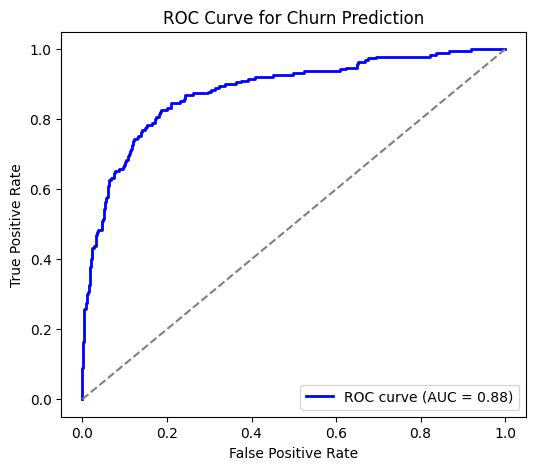

In [49]:
y_pred_prob = lr.predict_proba(X_test_rfe)[:, 1]
Roc(y_test, y_pred_prob)

### Decision Tree with RFE

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

# Decision Trees
def decisionTree(X_resampled, y_resampled, X_test, n_features_to_select=20):
    dt = DecisionTreeClassifier(random_state = 42)

    rfe = RFE(estimator=dt, n_features_to_select=n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
    X_test_rfe = rfe.transform(X_test)
    
    #Fitting the Model
    dt.fit(X_train_rfe, y_resampled)

    # Predict using the trained model
    y_train_pred = dt.predict(X_train_rfe) 
    y_test_pred = dt.predict(X_test_rfe)  
    return y_train_pred,y_test_pred,dt, X_test_rfe

In [51]:
import pandas as pd
## saving the reference data to give it while preicting in production
X_resampled.to_csv('reference_data.csv', index=False)


In [52]:

y_train_pred,y_test_pred,dt, X_test_rfe  = decisionTree(X_resampled, y_resampled, X_test)
print("\nFeature Weights in Decision Tree")

for feature, importance in zip(X_train.columns, dt.feature_importances_):
    print(f" {feature}, -{importance:.5f}")
    
#evaluate the performance of the model
accuracy_train,cm_train,cr_train=evaluation(y_resampled,y_train_pred)
accuracy_test,cm_test,cr_test=evaluation(y_test,y_test_pred)
print("-"*50)
print("Train data ")
for i in [accuracy_train,cm_train,cr_train]:
    print(i)

print("Test data ")
for i in [accuracy_test,cm_test,cr_test]:
    print(i)


Feature Weights in Decision Tree
 Tenure, -0.38442
 CityTier, -0.01742
 WarehouseToHome, -0.05460
 HourSpendOnApp, -0.02625
 NumberOfDeviceRegistered, -0.01585
 SatisfactionScore, -0.05320
 NumberOfAddress, -0.06283
 Complain, -0.03216
 OrderAmountHikeFromlastYear, -0.03379
 CouponUsed, -0.03752
 OrderCount, -0.02304
 DaySinceLastOrder, -0.07136
 CashbackAmount, -0.08772
 PreferredLoginDevice_MobilePhone, -0.01616
 PreferredPaymentMode_CreditCard, -0.01661
 PreferredPaymentMode_DebitCard, -0.00779
 PreferredPaymentMode_Ewallet, -0.00575
 PreferredPaymentMode_UPI, -0.03129
 Gender_Male, -0.01402
 PreferedOrderCat_Grocery, -0.00819
--------------------------------------------------
Train data 
1.0
[[3746    0]
 [   0 3746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00      3746

    accuracy                           1.00      7492
   macro avg       1.00      1.00      1.00      

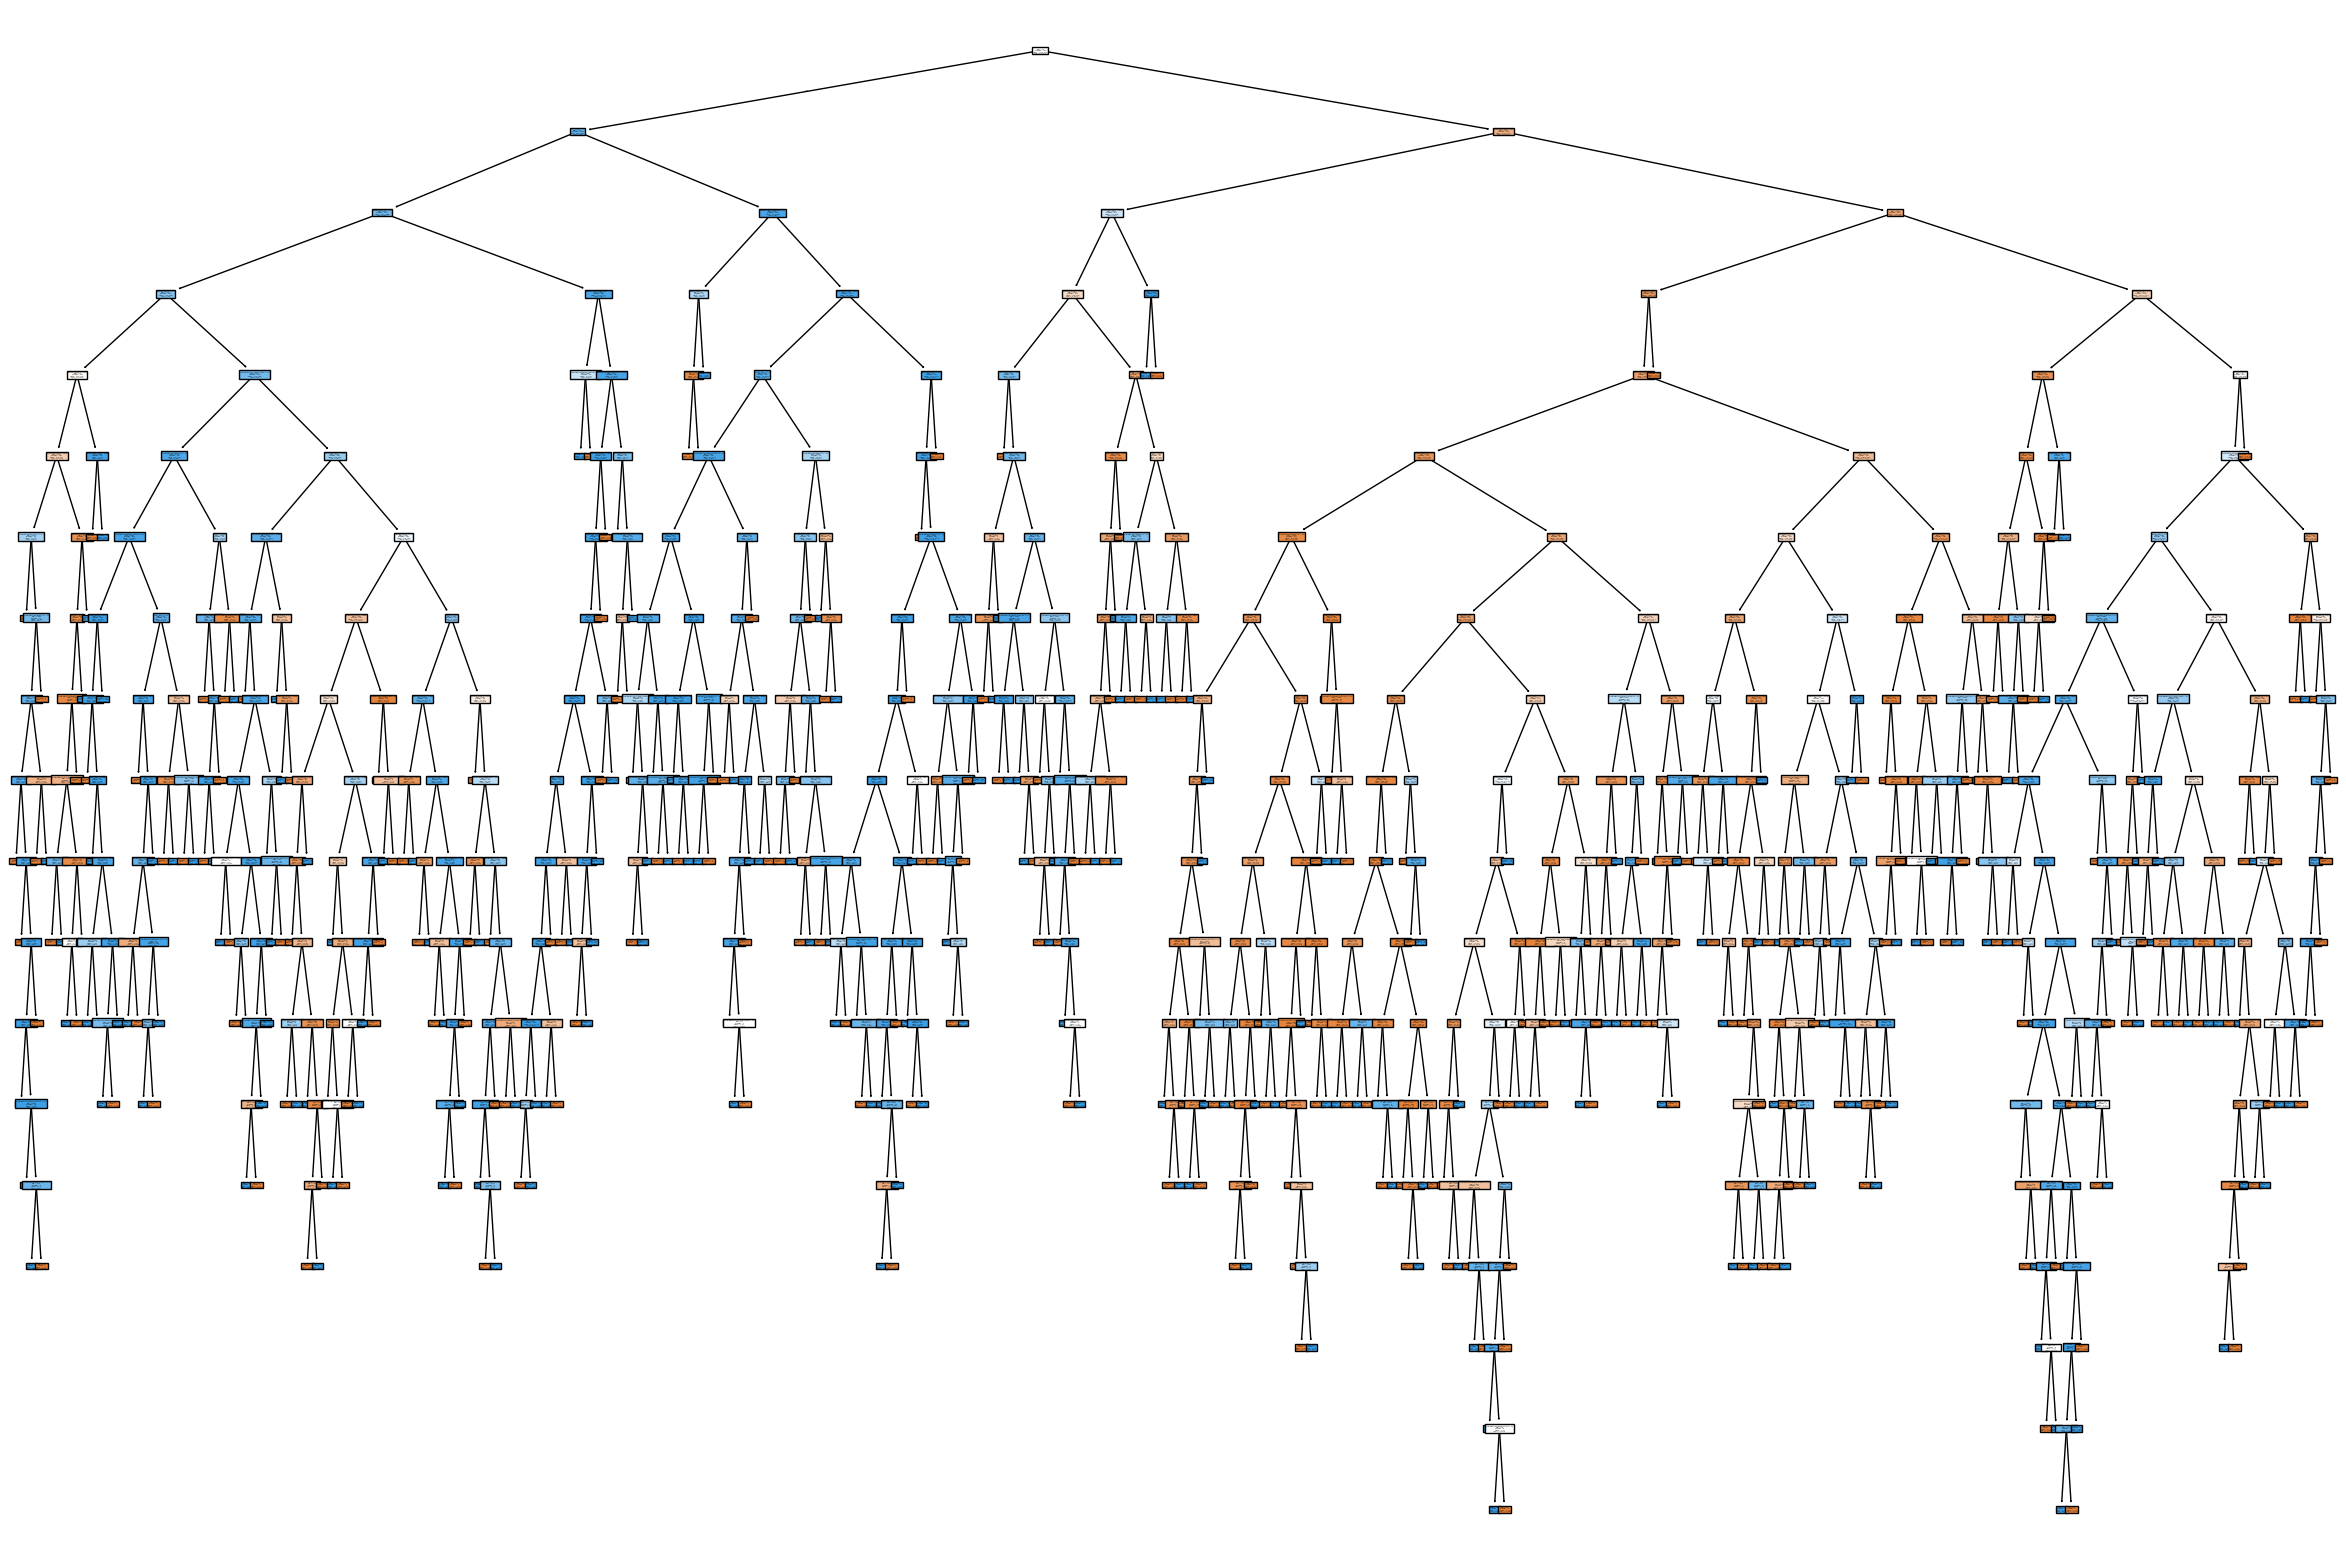

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(30,20))
plot_tree(dt, feature_names=X.columns,class_names=["no churn","churn"],filled=True)
plt.show()

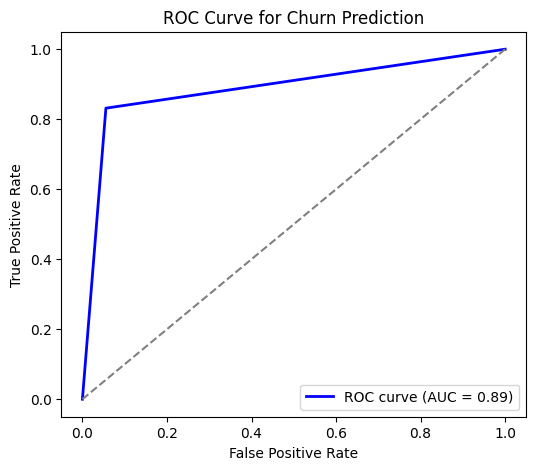

In [55]:
# ROC 
y_pred_prob = dt.predict_proba(X_test_rfe)[:, 1]
Roc(y_test, y_pred_prob)


- We can explain that this is not overfitting as the test data aswell performs very well. AUC 0.94 and recall 0.94 is a Good model

### Decison  tree with RFE and CV

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

# Decision Trees with Cross-Validation
def decisionTree_CV(X_resampled, y_resampled, X_test, n_features_to_select=20, cv=10):
    dt1 = DecisionTreeClassifier(random_state = 42)

    # RFE Implementation
    rfe = RFE(estimator=dt1, n_features_to_select=n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
    X_test_rfe = rfe.transform(X_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(dt1, X_train_rfe, y_resampled, cv=cv, scoring='accuracy')

    print("Cross-validation scores:", cv_scores)
    mean_cv_score = np.mean(cv_scores)
    print("Mean cross-validation score:", mean_cv_score)
    
    #Fitting the Model
    dt1.fit(X_train_rfe, y_resampled)

    # Predict using the trained model
    y_train_pred = dt1.predict(X_train_rfe) 
    y_test_pred = dt1.predict(X_test_rfe)  
    return y_train_pred,y_test_pred,dt1, X_test_rfe, cv_scores, mean_cv_score


In [61]:
y_train_pred, y_test_pred, dt1, X_test_rfe, cv_scores, mean_cv_score = decisionTree_CV(X_resampled, y_resampled, X_test)
print("\nFeature Weights in Decision Tree")

for feature, importance in zip(X_resampled.columns, dt1.feature_importances_):
    print(f"{feature}: {importance:.5f}")
#evaluate the performance of the model
accuracy_train,cm_train,cr_train=evaluation(y_resampled,y_train_pred)
accuracy_test,cm_test,cr_test=evaluation(y_test,y_test_pred)
print("-"*50)
print("Train data ")
for i in [accuracy_train,cm_train,cr_train]:
    print(i)

print("Test data ")
for i in [accuracy_test,cm_test,cr_test]:
    print(i)

Cross-validation scores: [0.884      0.87066667 0.95460614 0.94125501 0.95861148 0.94793057
 0.95594126 0.94793057 0.9506008  0.95327103]
Mean cross-validation score: 0.9364813529149979

Feature Weights in Decision Tree
Tenure: 0.38442
CityTier: 0.01742
WarehouseToHome: 0.05460
HourSpendOnApp: 0.02625
NumberOfDeviceRegistered: 0.01585
SatisfactionScore: 0.05320
NumberOfAddress: 0.06283
Complain: 0.03216
OrderAmountHikeFromlastYear: 0.03379
CouponUsed: 0.03752
OrderCount: 0.02304
DaySinceLastOrder: 0.07136
CashbackAmount: 0.08772
PreferredLoginDevice_MobilePhone: 0.01616
PreferredPaymentMode_CreditCard: 0.01661
PreferredPaymentMode_DebitCard: 0.00779
PreferredPaymentMode_Ewallet: 0.00575
PreferredPaymentMode_UPI: 0.03129
Gender_Male: 0.01402
PreferedOrderCat_Grocery: 0.00819
--------------------------------------------------
Train data 
1.0
[[3746    0]
 [   0 3746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1

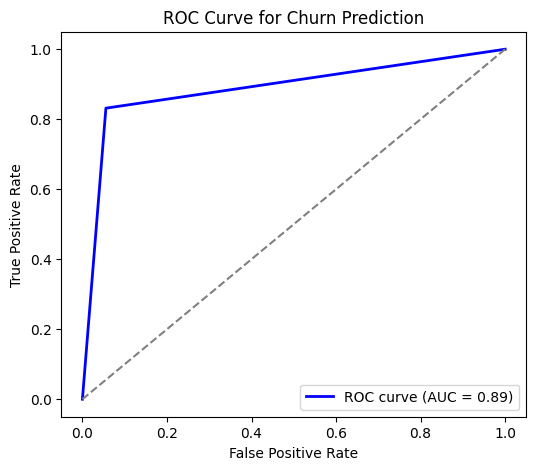

In [62]:
# ROC 
y_pred_prob = dt1.predict_proba(X_test_rfe)[:, 1]
Roc(y_test, y_pred_prob)


### Decision Tree with the hyperparameter tunning 

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Decision Trees with Hyperparameter Tuning
def decisionTree_hyperparameter_tuning(X_resampled, y_resampled, X_test, n_features_to_select=20, cv=5):
    
    # Define the parameter grid
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]  # None means use all features
    }

    dt2 = DecisionTreeClassifier(random_state = 42)

    # RFE Implementation
    rfe = RFE(estimator=dt2, n_features_to_select=n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
    X_test_rfe = rfe.transform(X_test)
    
    # Grid Search Cross-Validation
    grid_search = GridSearchCV(estimator=dt2, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=0)
    grid_search.fit(X_train_rfe, y_resampled)

    # Get the best estimator (Decision Tree) from the grid search
    best_dt = grid_search.best_estimator_

    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Predict using the trained model
    y_train_pred = best_dt.predict(X_train_rfe) 
    y_test_pred = best_dt.predict(X_test_rfe)  
    return y_train_pred, y_test_pred, best_dt, X_test_rfe


In [65]:
y_train_pred, y_test_pred, dt2, X_test_rfe = decisionTree_hyperparameter_tuning(X_resampled, y_resampled, X_test)
print("\nFeature Weights in Decision Tree")

for feature, importance in zip(X_resampled, dt2.feature_importances_):
    print(f"{feature}: {importance:.5f}")
#evaluate the performance of the model
accuracy_train,cm_train,cr_train=evaluation(y_resampled,y_train_pred)
accuracy_test,cm_test,cr_test=evaluation(y_test,y_test_pred)
print("-"*50)
print("Train data ")
for i in [accuracy_train,cm_train,cr_train]:
    print(i)

print("Test data ")
for i in [accuracy_test,cm_test,cr_test]:
    print(i)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Feature Weights in Decision Tree
Tenure: 0.30244
CityTier: 0.03938
WarehouseToHome: 0.06838
HourSpendOnApp: 0.01831
NumberOfDeviceRegistered: 0.02162
SatisfactionScore: 0.05881
NumberOfAddress: 0.05449
Complain: 0.03403
OrderAmountHikeFromlastYear: 0.05341
CouponUsed: 0.02313
OrderCount: 0.02344
DaySinceLastOrder: 0.08652
CashbackAmount: 0.06844
PreferredLoginDevice_MobilePhone: 0.02912
PreferredPaymentMode_CreditCard: 0.01083
PreferredPaymentMode_DebitCard: 0.00840
PreferredPaymentMode_Ewallet: 0.01552
PreferredPaymentMode_UPI: 0.04551
Gender_Male: 0.02558
PreferedOrderCat_Grocery: 0.01265
--------------------------------------------------
Train data 
1.0
[[3746    0]
 [   0 3746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00      3746

    accu

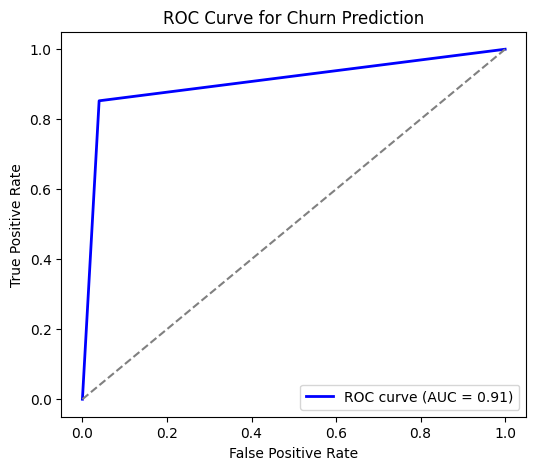

In [66]:
# ROC 
y_pred_prob = dt2.predict_proba(X_test_rfe)[:, 1]
Roc(y_test, y_pred_prob)

#### The precision and F1 score are little better than the normal for the churn=1 <br> Not much difference is noticed comparitively. AUC is much more

## Random Forest 

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

def randomForest(X_train, y_train, X_test, n_estimators=100, max_features='sqrt', random_state=42):
    # Initialize the Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                max_features=max_features, 
                                random_state=random_state)
    
    # Perform Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=rf, n_features_to_select=20)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    # Fit the Random Forest model *after* RFE
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    return y_train_pred, y_test_pred, rf, X_test


In [70]:

y_train_pred,y_test_pred,rf, X_test_rfe  = randomForest(X_resampled, y_resampled, X_test)
print("\nFeature Weights in Decision Tree")

for feature, importance in zip(X_resampled.columns, rf.feature_importances_):
    print(f" {feature}, -{importance:.5f}")
    
#evaluate the performance of the model
accuracy_train,cm_train,cr_train=evaluation(y_resampled,y_train_pred)
accuracy_test,cm_test,cr_test=evaluation(y_test,y_test_pred)
print("-"*50)
print("Train data ")
for i in [accuracy_train,cm_train,cr_train]:
    print(i)

print("Test data ")
for i in [accuracy_test,cm_test,cr_test]:
    print(i)


Feature Weights in Decision Tree
 Tenure, -0.24419
 CityTier, -0.02458
 WarehouseToHome, -0.05866
 HourSpendOnApp, -0.05366
 NumberOfDeviceRegistered, -0.02298
 SatisfactionScore, -0.03916
 NumberOfAddress, -0.04865
 Complain, -0.04014
 OrderAmountHikeFromlastYear, -0.05076
 CouponUsed, -0.04003
 OrderCount, -0.03878
 DaySinceLastOrder, -0.07504
 CashbackAmount, -0.08037
 PreferredLoginDevice_MobilePhone, -0.01520
 PreferredPaymentMode_CreditCard, -0.01668
 PreferredPaymentMode_DebitCard, -0.01233
 PreferredPaymentMode_Ewallet, -0.00727
 PreferredPaymentMode_UPI, -0.00441
 Gender_Male, -0.01252
 PreferedOrderCat_Grocery, -0.00728
 PreferedOrderCat_Laptop_Accessory, -0.02425
 PreferedOrderCat_Mobile, -0.02463
 PreferedOrderCat_Others, -0.00218
 MaritalStatus_Married, -0.04100
 MaritalStatus_Single, -0.01525
--------------------------------------------------
Train data 
1.0
[[3746    0]
 [   0 3746]]
              precision    recall  f1-score   support

           0       1.00      1.0

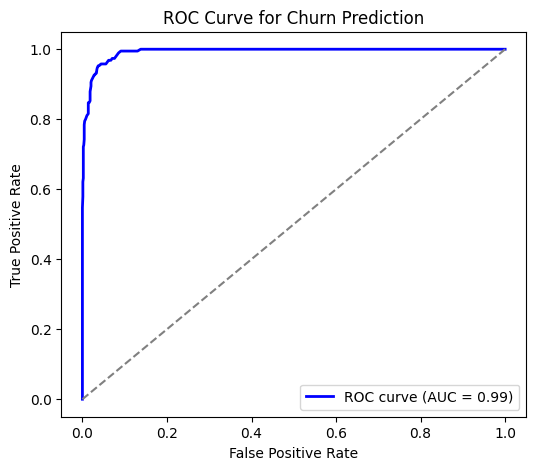

In [71]:
# ROC 
y_pred_prob = rf.predict_proba(X_test_rfe)[:, 1]
Roc(y_test, y_pred_prob)

#### Random Forest behaves well with good amount of accuracy and recall

###  Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
def GBM(X_train, y_train,X_test):
    gb = GradientBoostingClassifier(random_state = 42)
    X_train_rfe, X_test_rfe = rfe_fn(X_train, y_train, X_test, gb, 20)
    # Fitting the Model
    gb.fit(X_train, y_train)

    # Predict using the trained model
    y_train_pred = gb.predict(X_train)  
    y_test_pred = gb.predict(X_test)  
    return y_train_pred,y_test_pred,gb, X_test_rfe



In [73]:

y_train_pred,y_test_pred,gb, X_test_rfe = GBM(X_resampled, y_resampled,X_test)
print("\nFeature Weights in Logistic Regression")
for feature, coef in zip(X_train.columns, lr.coef_[0]):
    print(f"{feature}: {coef:.4f}")
    
#evaluate the performance of the model
accuracy_train,cm_train,cr_train=evaluation(y_resampled,y_train_pred)
accuracy_test,cm_test,cr_test=evaluation(y_test,y_test_pred)
print("-"*50)
print("Train data ")
for i in [accuracy_train,cm_train,
         ]:
    print(i)

print("Test data ")
for i in [accuracy_test,cm_test,cr_test]:
    print(i)


Feature Weights in Logistic Regression
Tenure: -1.3227
CityTier: 0.2977
WarehouseToHome: 0.5796
HourSpendOnApp: 0.5085
NumberOfDeviceRegistered: 0.2046
SatisfactionScore: 1.2851
NumberOfAddress: -0.7846
Complain: 0.8341
OrderAmountHikeFromlastYear: -0.7303
CouponUsed: -0.7984
OrderCount: -0.4987
DaySinceLastOrder: -1.5750
CashbackAmount: -1.3362
PreferredLoginDevice_MobilePhone: -0.7111
PreferredPaymentMode_CreditCard: -1.5803
PreferredPaymentMode_DebitCard: -1.5937
PreferredPaymentMode_Ewallet: -1.9410
PreferredPaymentMode_UPI: -0.7264
Gender_Male: -0.2583
PreferedOrderCat_Grocery: -1.0618
--------------------------------------------------
Train data 
0.9329951948745329
[[3494  252]
 [ 250 3496]]
Test data 
0.8969804618117229
[[864  72]
 [ 44 146]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       936
           1       0.67      0.77      0.72       190

    accuracy                           0.90      1126
   macro avg       0.

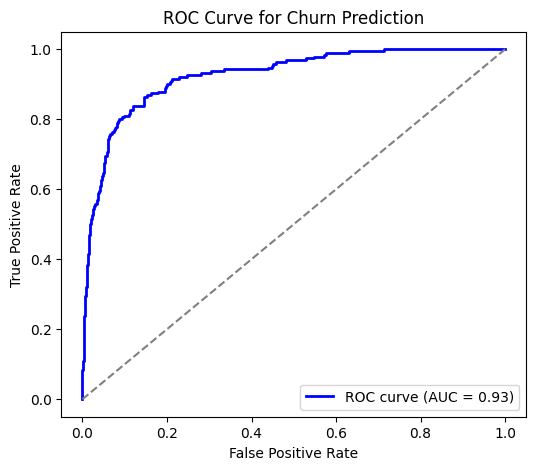

In [74]:

## ROC
y_pred_prob =gb.predict_proba(X_test)[:, 1]
Roc(y_test, y_pred_prob)

- Comparing all the models Decision Tress performs well when compared Recall and F1score. We finalize Decision Tree
    

## Saving the Model

In [75]:
import joblib
joblib.dump(dt, "DecisionTree.pkl")

['DecisionTree.pkl']

## Summary
what are the feature that impact more churn?<br>
Tenure - Tenure is negatively correlated to Churn .Churn is higher when Tenure is lower.
Complain - Tenure is positively correlated to Churn. High no. of complaints describes customer dissatisfaction,
           incresing the churn probability

What are different plots needed for getting insights about data?<br>
countpolts - categorical variables, Discreate numerical variables for both bivarient and univarient analysis
Boxplots - outlier prediction for numerical variables
HeatMap - Correlation os features

Missing Values Handling? Which method to use and why?<br>
Imputed the missing values with Mode. Used Mode as it is very effectient and safe way to replace missing values.

Is there any Class imbalance in the dataset?<br>
class imbalance is present with ratio 4:1. SMOTE is used to oversample churn=1 class.
PRedicted the output of the logistc regression model with and without synthetic oversampling. 
Metrics didnot change drastically

which model to choose for the dataset?<br>
The popular Classfication Model Logistic regression is used. 
Advanced techinques like Decision Trees and Grandiant Boosting are also used to predict the Churn.
All the models performed well. Simple and best model Logistic Regression can be taken as the final Model

How will the metrics for this model determined?<br>
FN are more costly in the churn prediction. Metrics determined are ROC, Recall, F1score

How well the Model predict the Future data?<br>
I have generated sample dummy rows using mean and some random noise.
Passed this sample to the Model to predict the churn and then passing the same model 
to predict the churn in our maodel and comparing


created Monitoring using the Moniotring Tool Evidently AI - ClassificationPreset